## Table of Contents
###  [1.Pre-Processing](pre-processing.ipynb)
###  [2.Data Assimilation](Data Assimilation.ipynb)
###  [3.Post-Processing](post-processing.ipynb)
<div class="toc" style="margin-top: 1em;">
   <ul class="toc-item" id="toc-level0">
      <li><span><a href='#part 3.1' data-toc-modified-id="part 1"><span class="toc-item-num">&nbsp;&nbsp;</span>3.1 Prior vs. Posterior HEF </a></span></li>
      <li><span><a href='#part 3.2' data-toc-modified-id="part 2"><span class="toc-item-num">&nbsp;&nbsp;</span>3.2 Different configurations for observation points</a></span></li>
      <li><span><a href='#part 3.3' data-toc-modified-id="part 3"><span class="toc-item-num">&nbsp;&nbsp;</span>3.3 Frequency of Data collecting</a></span></li>
      <li><span><a href='#part 3.4' data-toc-modified-id="part 2"><span class="toc-item-num">&nbsp;&nbsp;</span>3.4 Number of iterations</a></span></li>
      <li><span><a href='#part 3.5' data-toc-modified-id="part 3"><span class="toc-item-num">&nbsp;&nbsp;</span>3.5 Initial Emsemble of Permeability</a></span></li>
    <li><span><a href='#part 3.6' data-toc-modified-id="part 3"><span class="toc-item-num">&nbsp;&nbsp;</span>3.6 Heterogeneity</a></span></li>     
</div>





<a id='part 3.1'></a>
# 3.1 Prior vs. Posterior HEF 
The hydrologic exchange flux (HEF) is calculated based on Darcy's: HEF = K * VHG, where K is hydraulic conductivity and VHG is vertical hydraulic gradient. VHG is calculated based on the field measurements of hydraulic head at different depth. For prior HEF, K is the initial hydraulic conductivity generated for all realizations that satisfies normal distribution. For posterior HEF, K is the calculated hydraulic conductivity using ES-MDA.

In [ ]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date
from scipy import stats
from IPython.display import Image
# ##### 
# init_hy_cond = np.loadtxt('./results/init_hy_cond.txt',dtype=float)
# perm = np.loadtxt('./results/perm_BC14_Obs0.05_4.1-5.1.txt',dtype=float)
# perm_undis = np.loadtxt('./results/perm_BC14_Obs0.05_4.1-5.1_undis.txt',dtype=float)
# true_flux = pd.read_csv('./dainput/true_flux.csv',sep=',',header=0)

# hy_cond = perm*1e6*9.8*3600*24
# hy_cond_undis = perm_undis*1e6*9.8*3600*24 
# hy_cond_3D = 32

# true_flux['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in true_flux['time']]
# dt = true_flux['time']
# dt = [mdates.date2num(x) for x in dt]

# nreaz = init_perm.shape[0] 
# ntime = perm.shape[0]
# fsize = 5

# fig = plt.figure(num=1,dpi=300)
# fig.subplots_adjust(hspace=.5)
# plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    
# plt.subplot(411)
# line1, = plt.plot(dt,init_hy_cond[0]*(true_flux['hy_grad'].values),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt,init_hy_cond[i]*(true_flux['hy_grad'].values),'orange',linewidth=0.25)
# line2, = plt.plot(dt,np.mean(init_hy_cond)*(true_flux['hy_grad'].values),'k-',linewidth=1)       
# line3, = plt.plot(dt,-true_flux['avg_flux'].values*24,'b',linewidth=1)
    
# plt.title("a.Prior",fontsize=fsize)
# #plt.xlabel("Date")
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([-5,5])
# plt.legend((line1,line2,line3),('Realization','Mean','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])    
# #    plt.xticks(np.arange(-5,5,2.5))
# plt.tick_params(axis='both', which='major', labelsize=fsize)
    
# plt.subplot(412)
# line4, = plt.plot(dt[0:ntime],hy_cond[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line5, = plt.plot(dt[0:ntime],np.mean(hy_cond[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line6, =plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
# plt.title("b.Posterior-Dynamic K",fontsize=fsize)
# #    plt.xlabel("Date")
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([-5,5])
# plt.legend((line4,line5,line6),('Realization','Mean','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=5)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())    
# ax.xaxis.set_ticklabels([])   
# #    plt.xticks(np.arange(-5,5,2.5))
# plt.tick_params(axis='both', which='major', labelsize=fsize)

# plt.subplot(413)
# line77, = plt.plot(dt[0:ntime],hy_cond_undis[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond_undis[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line7, = plt.plot(dt[0:ntime],np.mean(hy_cond_undis[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line8, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
# plt.title("c.Posterior-Constant K",fontsize=fsize)
# #plt.xlabel("Date")
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([-5,5])
# plt.legend((line77,line7,line8),('Realization','Mean','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)

# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])    
# #    plt.xticks(np.arange(-5,5,2.5))
# plt.tick_params(axis='both', which='major', labelsize=fsize)


# plt.subplot(414)
# line8, = plt.plot(dt[0:ntime],hy_cond_undis[0:ntime,0],'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond_undis[0:ntime,i],'orange',linewidth=0.25)
# line9, = plt.plot(dt[0:ntime],np.mean(hy_cond_undis[0:ntime,:],axis=1),'k-',linewidth=1)
# line10, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
# line11, = plt.plot(dt[0:ntime],hy_cond[0:ntime,0],'r',linewidth=1)
# plt.title("d.Hydraulic Conductivity Comparison",fontsize=fsize)
# plt.xlabel("Date",fontsize=fsize)
# plt.ylabel("K (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([0,80])
# plt.legend((line8,line9,line10,line11),('Realization(K-undis)','Constant K','True','Dynamic K'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)

# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=5)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# plt.yticks(np.arange(0,100,20))
# plt.tick_params(axis='both', which='major', labelsize=fsize)
# plt.savefig('./figure/prior_post.png',dpi=300)

# plt.show()

# plt.subplot(121)
# fig.subplots_adjust(hspace=2)
# plt.tight_layout()

# line12 = plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24,np.mean(hy_cond[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]))
# line13 = plt.plot(np.linspace(-5,5,num=50),np.linspace(-5,5,num=50),'k')
# plt.title('a. Dynamic K')
# plt.xlabel('True flux (m/d)')
# plt.ylabel('Estimated flux (m/d)')
# plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.gca().set_aspect('equal', adjustable='box')

# plt.subplot(122)
# fig.subplots_adjust(hspace=2)
# plt.tight_layout()
# line12 = plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24,np.mean(hy_cond_undis[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]))
# line13 = plt.plot(np.linspace(-5,5,num=50),np.linspace(-5,5,num=50),'k')
# plt.title('b. Constant K')
# plt.xlabel('True flux (m/d)')
# plt.ylabel('Estimated flux (m/d)')
# plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.gca().set_aspect('equal', adjustable='box')

# plt.savefig('./figure/flux correlation.png')
# plt.show()

# ###########################################################################################################################
# #
# #                               Correlation between true K and true flux                   
# #
# ###########################################################################################################################
# plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24/true_flux['hy_grad'][0:ntime],-true_flux['avg_flux'].values[0:ntime]*24)
# plt.plot(np.mean(-true_flux['avg_flux'].values[0:ntime]*24/true_flux['hy_grad'][0:ntime])*np.ones(20),np.linspace(-2,2,num=20),'k')
# plt.title('Mean K = {}'.format(np.mean(-true_flux['avg_flux'].values[0:ntime]*24/true_flux['hy_grad'][0:ntime])))
# plt.xlabel('Hydraulic Conductivity (m/d)')
# plt.ylabel('Flux (m/d)')
# plt.savefig('./figure/true K-Flux correlation.png')
# plt.show()
                        
# ###########################################################################################################################
# #
# #                               Correlation between estimated K and estimated flux                   
# #
# ###########################################################################################################################
# plt.scatter(np.mean(hy_cond[0:ntime],axis=1),-np.mean(hy_cond[0:ntime],axis=1)*true_flux['hy_grad'].values[0:ntime])
# plt.xlabel('Hydraulic Conductivity (m/d)')
# plt.ylabel('Flux (m/d)')
# plt.savefig('./figure/estimated K-Flux correlation.png')
# plt.show()

###########################################################################################################################
#
#                                   ENKF vs. ESMDA
#
###########################################################################################################################
simu_ensemble0 = np.loadtxt('./results/ENKF-ESMDA/simu_ensemble0.txt',dtype=float)
simu_ensemble1 = np.loadtxt('./results/ENKF-ESMDA/simu_ensemble1.txt',dtype=float)
simu_ensemble2 = np.loadtxt('./results/ENKF-ESMDA/simu_ensemble2.txt',dtype=float)
simu_ensemble3 = np.loadtxt('./results/ENKF-ESMDA/simu_ensemble3.txt',dtype=float)
simu_ensemble4 = np.loadtxt('./results/ENKF-ESMDA/simu_ensemble4.txt',dtype=float)
simu_ensemble_enkf = np.loadtxt('./results/ENKF-ESMDA/simu_ensemble_enkf.txt',dtype=float)
perm = np.loadtxt('./results/ENKF-ESMDA/perm.txt',dtype=float)
th_cond = np.loadtxt('./results/ENKF-ESMDA/th_cond.txt',dtype=float)
init_perm = np.loadtxt('./results/ENKF-ESMDA/init_perm.txt',dtype=float)
init_th_cond = np.loadtxt('./results/ENKF-ESMDA/init_th_cond.txt',dtype=float)
obs_temp = np.loadtxt('./results/ENKF-ESMDA/obs_temp.txt',dtype=float)

nreaz = init_perm.shape[0] 
ntime = perm.shape[0]
fsize = 5

fig = plt.figure(num=1,dpi=300)
fig.subplots_adjust(wspace=0.5,hspace=0.5)
plt.tight_layout(h_pad=2)
    
plt.subplot(241)
line1, = plt.plot(dt,simu_ensemble0[:,0],'orange',linewidth=0.05)
for i in range(1,nreaz-1):
    plt.plot(dt,simu_ensemble0[:,i],'orange',linewidth=0.05)
line2, = plt.plot(dt,np.mean(simu_ensemble0,axis=1),'k-',linewidth=0.5)   
line3, = plt.plot(dt,obs_temp,'r',linewidth=0.5)

plt.title("a.Prior",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("Temp. (°C)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.legend((line1,line2,line3),('Realization','Mean','Data'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])    
plt.yticks(np.arange(5,9.1,1))
plt.xticks(np.linspace(np.asarray(dt)[0],np.asarray(dt)[-1],num=4))
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(242)
line1, = plt.plot(np.array(dt)[0:720],simu_ensemble_enkf[:,0],'orange',linewidth=0.05)
for i in range(1,nreaz-1):
    plt.plot(np.array(dt)[0:720],simu_ensemble_enkf[:,i],'orange',linewidth=0.05)
line2, = plt.plot(np.array(dt)[0:720],np.mean(simu_ensemble_enkf,axis=1),'k-',linewidth=0.5)   
line3, = plt.plot(np.array(dt),obs_temp,'r',linewidth=0.5)

plt.title("b.ENKF",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("Temp. (°C)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.legend((line1,line2,line3),('Realization','Mean','Data'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_ylim([5,9])
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([]) 
plt.xticks(np.linspace(np.asarray(dt)[0],np.asarray(dt)[-1],num=4))
plt.yticks(np.arange(5,9.1,1))
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(243)
line1, = plt.plot(dt,simu_ensemble1[:,0],'orange',linewidth=0.05)
for i in range(1,nreaz-1):
    plt.plot(dt,simu_ensemble1[:,i],'orange',linewidth=0.05)
line2, = plt.plot(dt,np.mean(simu_ensemble1,axis=1),'k-',linewidth=0.5)   
line3, = plt.plot(dt,obs_temp,'r',linewidth=0.5)

plt.title("c.ESMDA(1X)",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("Temp. (°C)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.legend((line1,line2,line3),('Realization','Mean','Data'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])   
plt.xticks(np.linspace(np.asarray(dt)[0],np.asarray(dt)[-1],num=4))
plt.yticks(np.arange(5,9.1,1))
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(244)
line1, = plt.plot(dt,simu_ensemble2[:,0],'orange',linewidth=0.05)
for i in range(1,nreaz-1):
    plt.plot(dt,simu_ensemble2[:,i],'orange',linewidth=0.05)
line2, = plt.plot(dt,np.mean(simu_ensemble2,axis=1),'k-',linewidth=0.5)   
line3, = plt.plot(dt,obs_temp,'r',linewidth=0.5)

plt.title("d.ESMDA(2X)",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("Temp. (°C)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.legend((line1,line2,line3),('Realization','Mean','Data'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])  
plt.xticks(np.linspace(np.asarray(dt)[0],np.asarray(dt)[-1],num=4))
plt.yticks(np.arange(5,9.1,1))
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(245)
line1, = plt.plot(dt,simu_ensemble3[:,0],'orange',linewidth=0.05)
for i in range(1,nreaz-1):
    plt.plot(dt,simu_ensemble3[:,i],'orange',linewidth=0.05)
line2, = plt.plot(dt,np.mean(simu_ensemble3,axis=1),'k-',linewidth=0.5)   
line3, = plt.plot(dt,obs_temp,'r',linewidth=0.5)

plt.title("e.ESMDA(3X)",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("Temp. (°C)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.legend((line1,line2,line3),('Realization','Mean','Data'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])  
plt.xticks(np.linspace(np.asarray(dt)[0],np.asarray(dt)[-1],num=4))
plt.yticks(np.arange(5,9.1,1))
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(246)
line1, = plt.plot(dt,simu_ensemble4[:,0],'orange',linewidth=0.05)
for i in range(1,nreaz-1):
    plt.plot(dt,simu_ensemble4[:,i],'orange',linewidth=0.05)
line2, = plt.plot(dt,np.mean(simu_ensemble4,axis=1),'k-',linewidth=0.5)   
line3, = plt.plot(dt,obs_temp,'r',linewidth=0.5)

plt.title("f.ESMDA(4X)",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("Temp. (°C)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.legend((line1,line2,line3),('Realization','Mean','Data'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])  
plt.xticks(np.linspace(np.asarray(dt)[0],np.asarray(dt)[-1],num=4))
plt.yticks(np.arange(5,9.1,1))
plt.tick_params(axis='both', which='major', labelsize=fsize)

plt.subplot(2,4,7)

perm = np.concatenate((init_perm.reshape(1,100),perm[0:-1,:]),axis=0)
th_cond = np.concatenate((init_th_cond.reshape(1,100),th_cond[0:-1,:]),axis=0)
plt.boxplot(np.transpose(np.log(perm)), showfliers=False)
plt.xticks([1,2,3,4,5],['Prior','ESMDA(1X)','ESMDA(2X)','ESMDA(3X)','ESMDA(4X)'],fontsize=fsize)
plt.yticks(np.arange(-30,-21.9,2),fontsize=fsize)
plt.ylabel('log(k) (log(m$^{2}$))',fontsize=fsize)
plt.title('g.Permeability',fontsize=fsize)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

plt.subplot(2,4,8)
plt.boxplot(np.transpose(th_cond), showfliers=False)
plt.xticks([1,2,3,4,5],['Prior','ESMDA(1X)','ESMDA(2X)','ESMDA(3X)','ESMDA(4X)'],fontsize=fsize)
plt.yticks(np.arange(0.5,2.6,0.5),fontsize=fsize)
plt.ylabel('Thermal Cond. (W/(mK))',fontsize=fsize)
plt.title('h.Thermal Conductivity',fontsize=fsize)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('./figure/ENKF-ESMDA.png')

#########################################################################################################################################
#
#                                                      flux estimation
#
######################################################################################################################################
data = pd.read_csv('./results/flux/data.csv',sep=',',header=0)

data['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in data['time']]
dt1 = data['time']
dt1 = [mdates.date2num(x) for x in dt1]

fig = plt.figure(num=2,dpi=300)
fig.subplots_adjust(wspace=0.5,hspace=0.5)
plt.tight_layout(h_pad=2)
    
plt.subplot(311)
line1, = plt.plot(dt1,data['hy_cond'],'k',linewidth=0.5)

plt.title("a.Annual Variation of Hydraulic Conductivity",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("K (m/d)",fontsize=fsize)
plt.xlim([date(2016,7,1),date(2017,7,1)])
#plt.legend((line1),('Realization','Mean','Data'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
#ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_ylim([15,35])
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])    
plt.yticks(np.arange(15,41,5),fontsize=fsize)
xlabel = ['7/1/16','8/1/16','9/1/16','10/1/16','11/1/16','12/1/16','1/1/17','2/1/17','3/1/17','4/1/17','5/1/17','6/1/17','7/1/17']
xlabel = [datetime.strptime(x,"%m/%d/%y") for x in xlabel]
plt.xticks(xlabel,fontsize=fsize)

ax2 = ax.twinx()
ax2.plot(dt1,data['temp'],'r',linewidth=0.5)
ax2.set_ylabel('Temp (°C)', color='r',fontsize=fsize)
ax2.set_ylim([0,25])
plt.yticks(np.arange(0,25.1,5),fontsize=fsize, color='r')

plt.subplot(312)
line1, = plt.plot(dt1,data['true_flux'],'r',linewidth=0.5)
line2, = plt.plot(dt1,data['cal_flux'],'b',linewidth=0.5)
plt.title("b.Flux Estimation",fontsize=fsize)
#plt.xlabel("Date")
plt.ylabel("VHEF (m/d)",fontsize=fsize)
plt.xlim([date(2016,7,1),date(2017,7,1)])
plt.legend((line1,line2),('PFLOTRAN','Estimated'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
#ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_ylim([-3,6])
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])    
plt.yticks(np.arange(-3,6.1,3),fontsize=fsize)
xlabel = ['7/1/16','8/1/16','9/1/16','10/1/16','11/1/16','12/1/16','1/1/17','2/1/17','3/1/17','4/1/17','5/1/17','6/1/17','7/1/17']
xlabel = [datetime.strptime(x,"%m/%d/%y") for x in xlabel]
plt.xticks(xlabel,fontsize=fsize)
#plt.xticks(np.arange(-4,8.1,2),fontsize=fsize)
plt.yticks(np.arange(-4,8.1,2),fontsize=fsize)

plt.subplot(325)
plt.scatter(data['true_flux'],data['cal_flux'],s=1,color=['green'])
plt.xlabel('Flux in PFLOTRAN (m/d)',fontsize=fsize)
plt.ylabel('Calculated flux (m/d)',fontsize=fsize)
plt.title('c. Flux Comparison',fontsize=fsize)
plt.xticks(np.arange(-4,8.1,2),fontsize=fsize)
plt.yticks(np.arange(-4,8.1,2),fontsize=fsize)

plt.subplot(326)
plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24/true_flux['hy_grad'][0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,s=1,color=['orange'])
plt.title('d. K-Flux',fontsize=fsize)
plt.xlabel('Flux/VHG (m/d)',fontsize=fsize)
plt.ylabel('Flux in PFLOTRAN (m/d)',fontsize=fsize)
plt.xticks(np.arange(-150,151,50),fontsize=fsize)
plt.yticks(np.arange(-2,2.1,1),fontsize=fsize)

plt.savefig('./figure/flux estimation.png')
plt.show()

#################################################################################################################################
#
#                                               VFLUX
#
#################################################################################################################################
data_vflux = pd.read_csv('./results/VFLUX/data_vflux.csv',sep=',',header=0)
data= pd.read_csv('./results/VFLUX/data_4-5.csv',sep=',',header=0)

data['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in data['time']]
dt2 = data['time']
dt2 = [mdates.date2num(x) for x in dt2]

data_vflux['time_vflux'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in data_vflux['time_vflux']]
dt3 = data_vflux['time_vflux']
dt3 = [mdates.date2num(x) for x in dt3]

fig = plt.figure(num=3,dpi=300)
fig.subplots_adjust(wspace=0.5,hspace=0.5)
plt.tight_layout(h_pad=2)

plt.subplot(221)
line1, = plt.plot(dt2,data['true_flux'],'k',linewidth=0.5)
line2, = plt.plot(dt3,data_vflux['flux_vflux'],'r',linewidth=0.5)

#plt.xlabel("Date")
plt.ylabel("Flux (m/d)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.legend((line1,line2),('Calculated flux','VFLUX2'),frameon=False,bbox_to_anchor=(0,0,0.12,1),ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
ax = plt.gca()
daysFmt = mdates.DateFormatter("%-m/%-d/%y")
days = mdates.DayLocator(interval=10)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_ylim([-2,2.1])
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])    
plt.ylabel('Calculated flux (m/d)',fontsize=fsize)
plt.yticks(np.arange(-2,2.1,1),fontsize=fsize)
plt.xticks(np.linspace(np.asarray(dt2)[0],np.asarray(dt2)[-1],num=4),fontsize=fsize)

plt.savefig('./figure/vflux2.png')

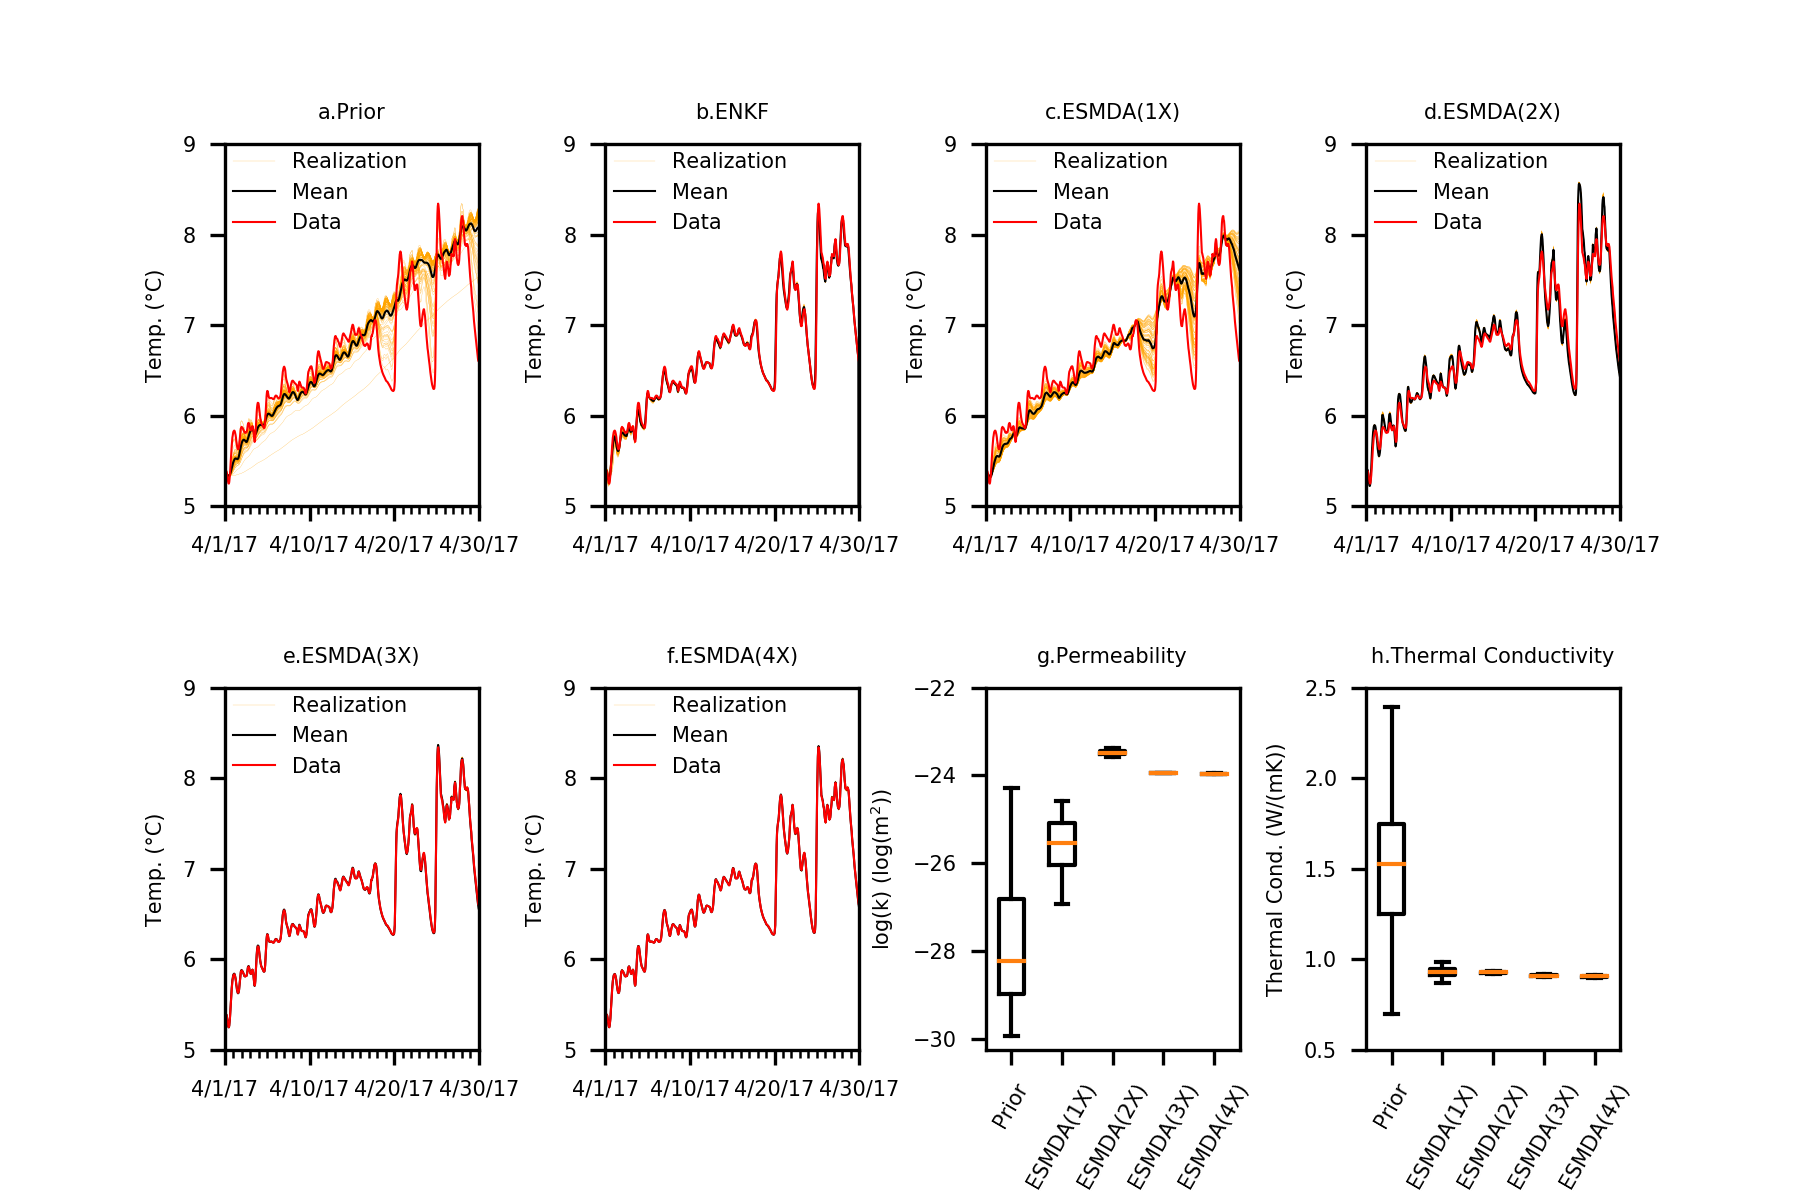

In [11]:
Image('./figure/ENKF-ESMDA.png')

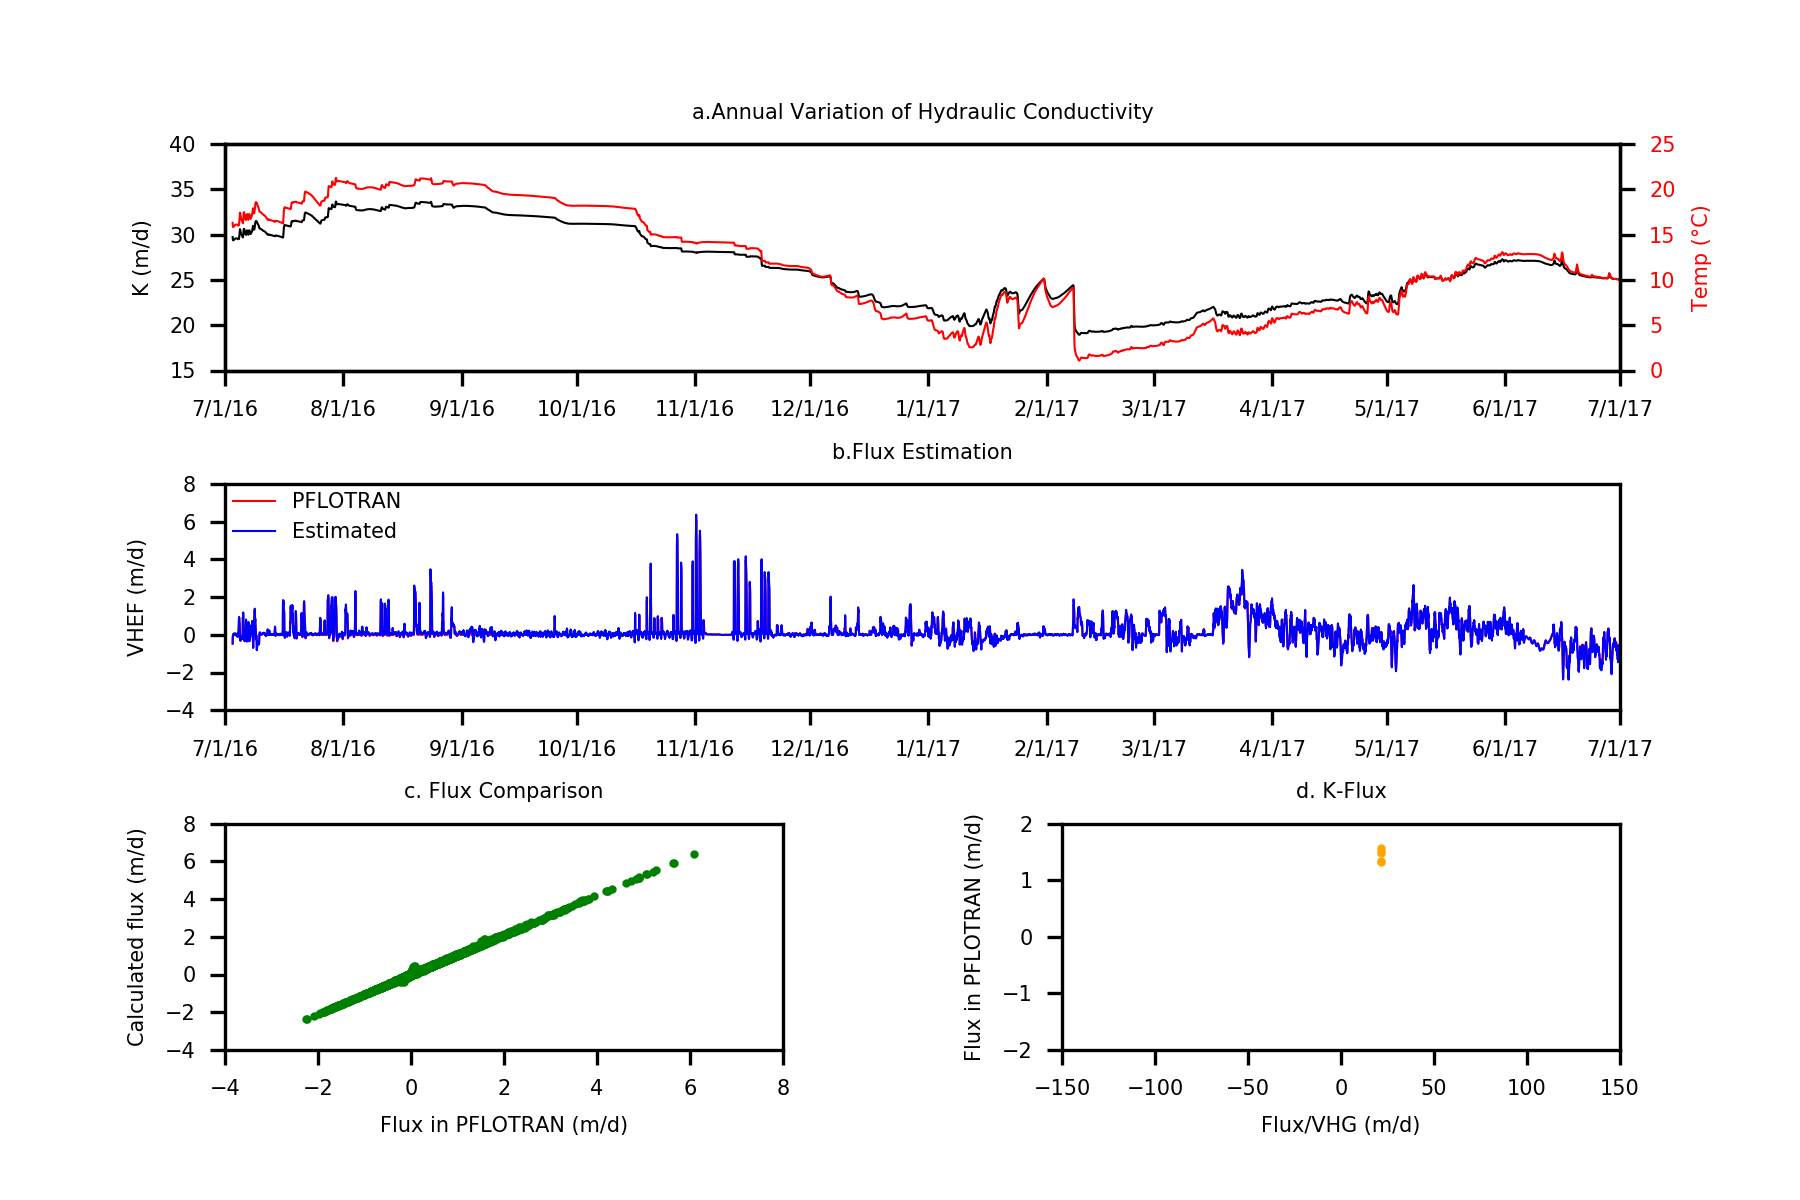

In [12]:
Image('./figure/flux estimation.png')

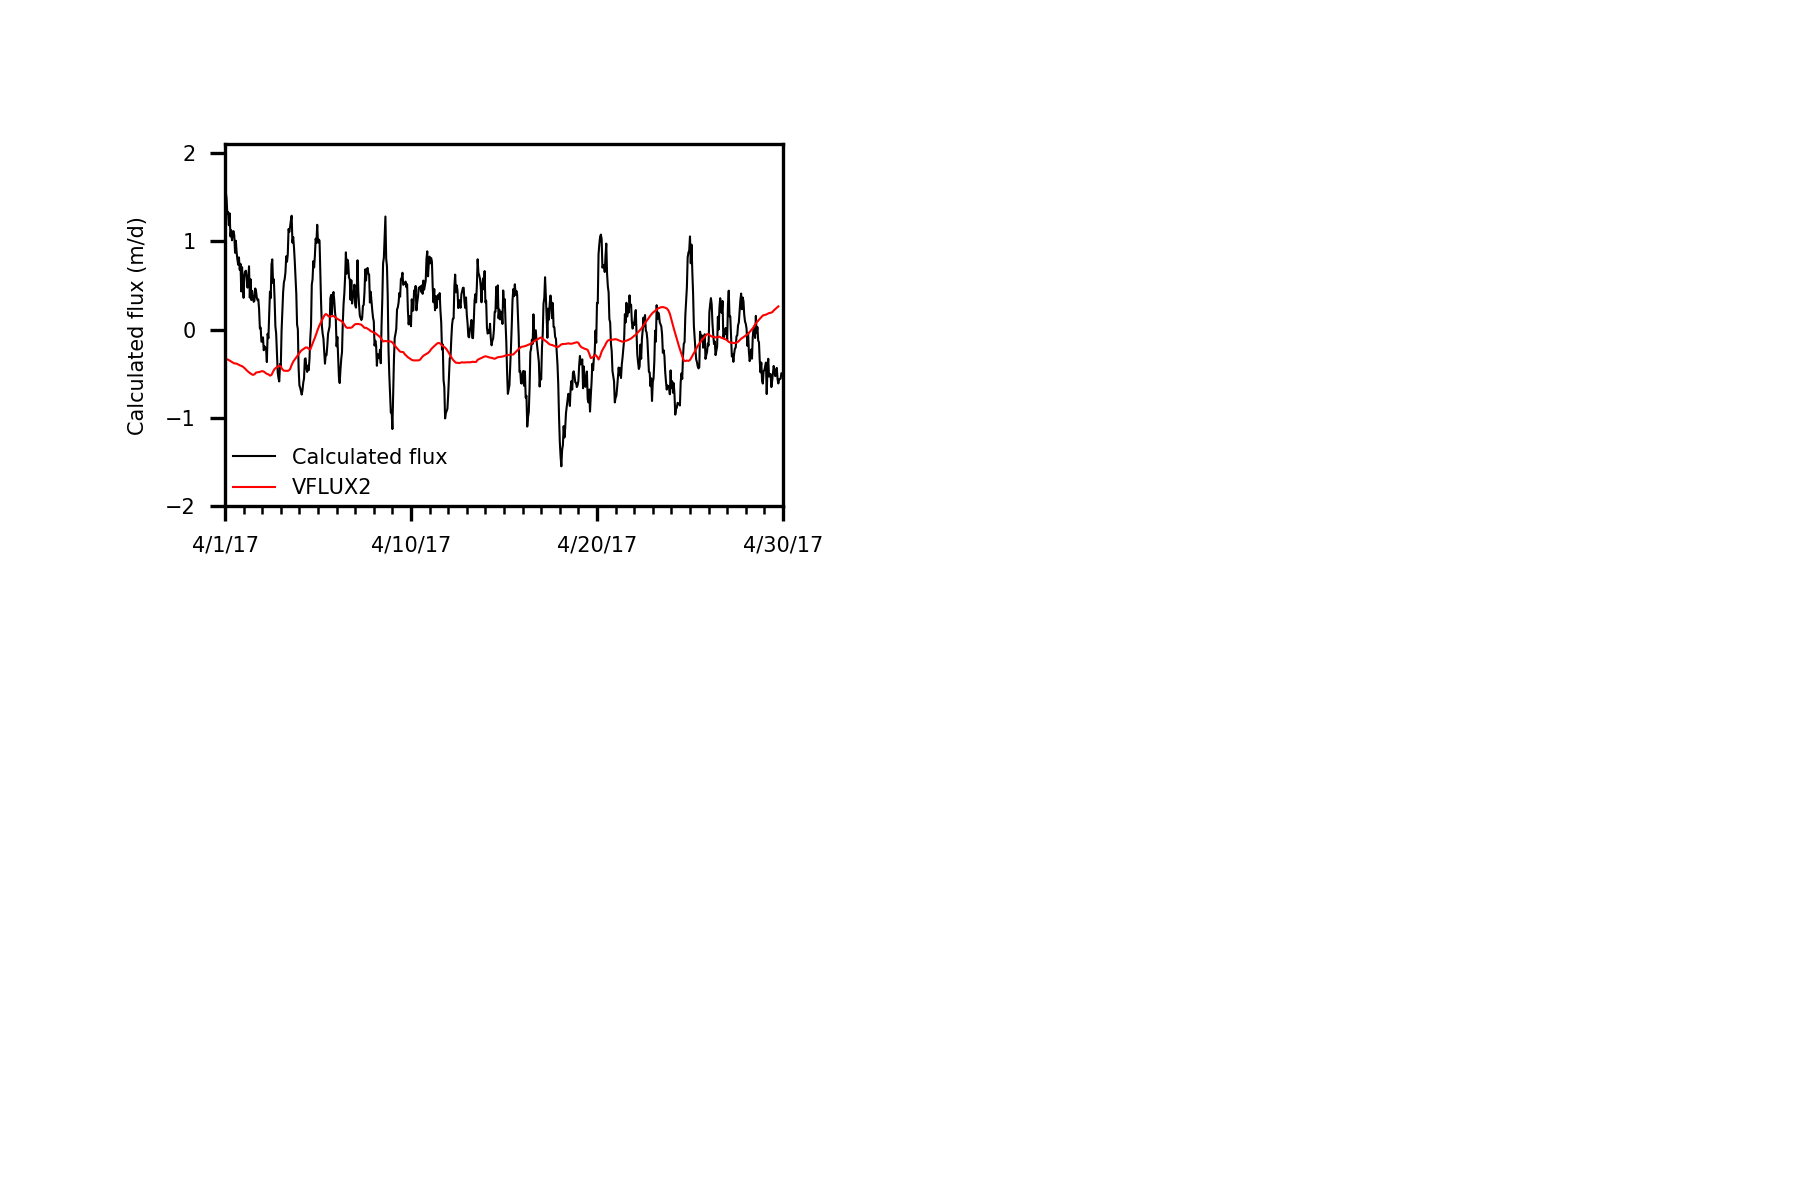

In [13]:
Image('./figure/vflux2.png')

<a id='part 3.2'></a>
# 3.2 Different configurations for observation points

There are four temperature sensors (named 1,2,3,4 from top to bottom) that are used to record the temperature variations above and below riverbed. Sensor 1 is 0.16 m above the riverbed, and sensors 2,3 and 4 are 0.04 m, 0.24 m and 0.64 m below the riverbed, respectively. Three sceneries are considerd:
a. 2 observation points at the locations of sensor 2 and 3
b. 1 obsercation point at the location of sensor 2
c. 1 observation point at the location of sensor 3

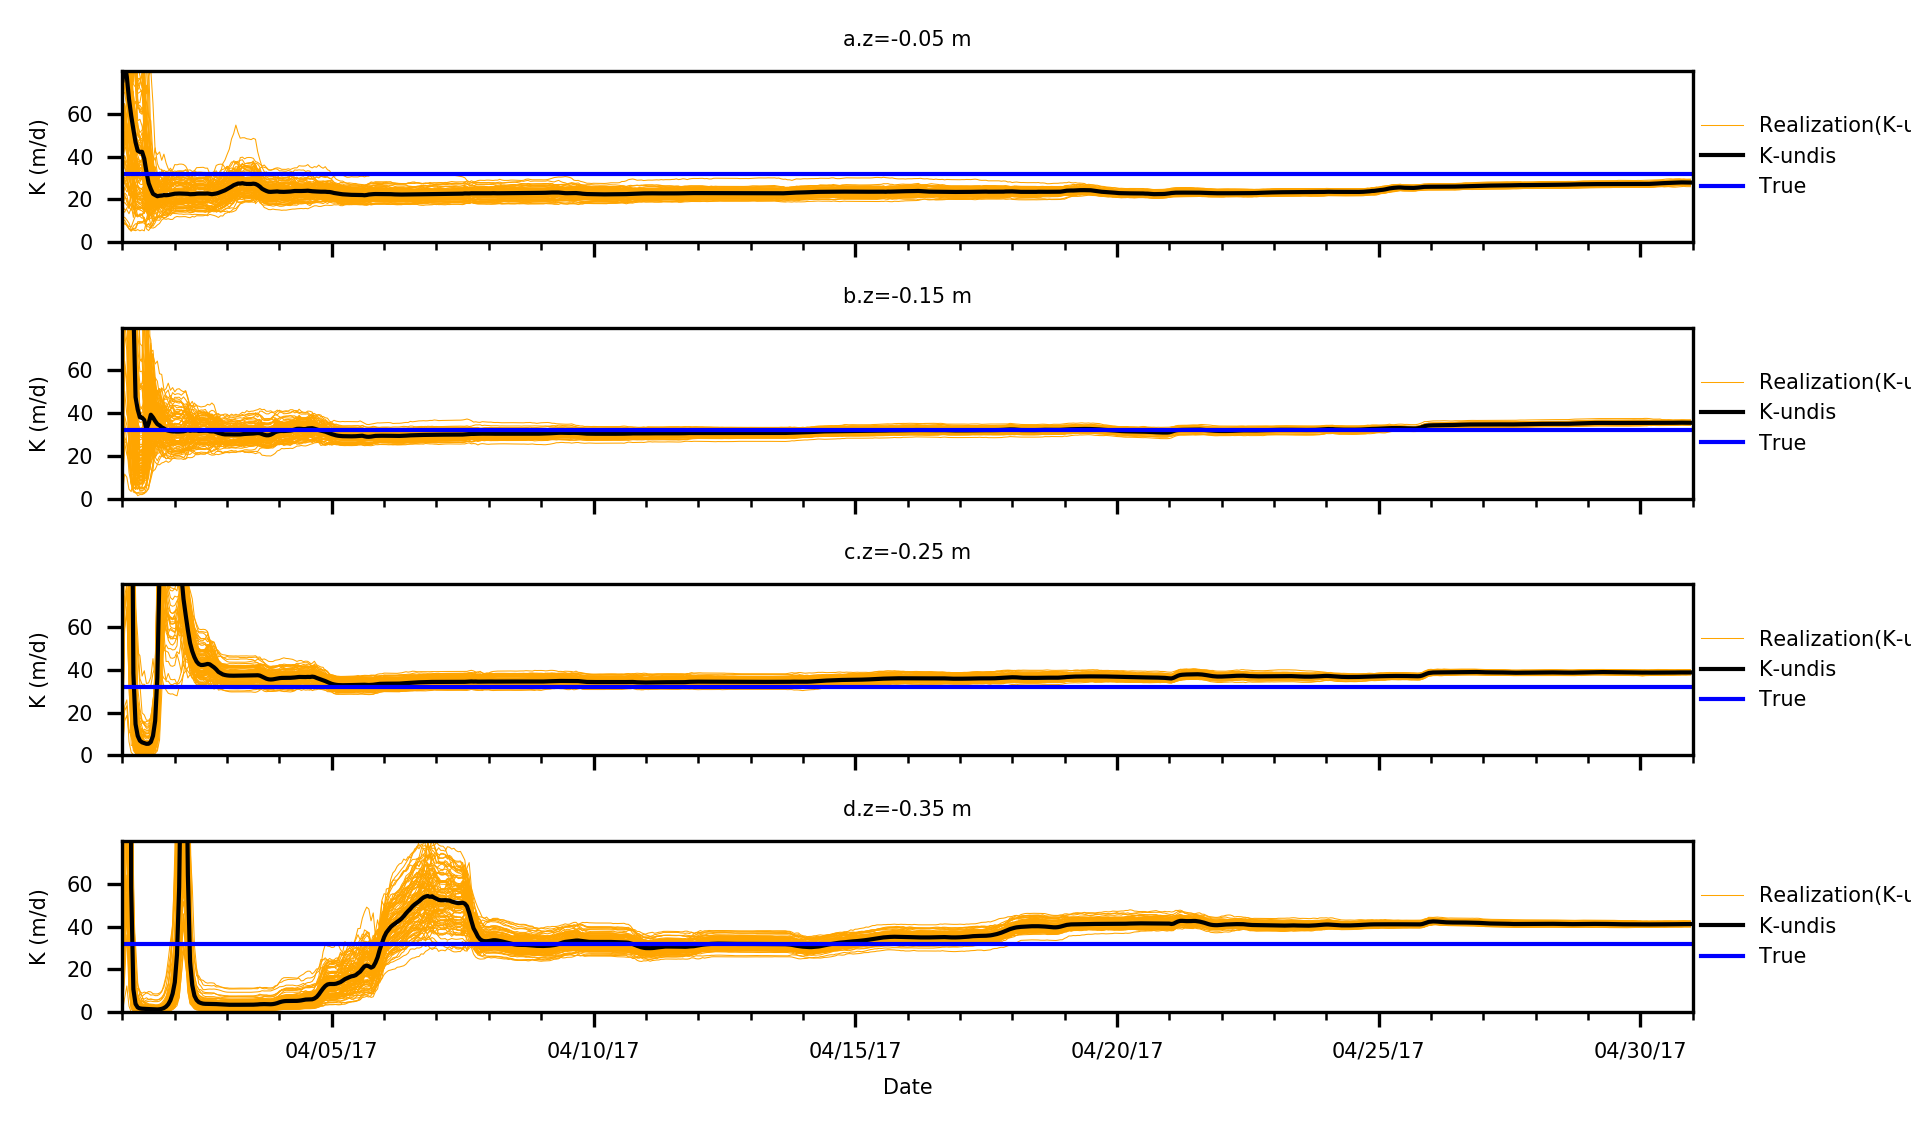

In [509]:
perm05 = np.loadtxt('./results/perm_BC14_Obs0.05_undis_4.1-5.1.txt',dtype=float)
perm15 = np.loadtxt('./results/perm_BC14_Obs0.15_undis_4.1-5.1.txt',dtype=float)
perm25 = np.loadtxt('./results/perm_BC14_Obs0.25_undis_4.1-5.1.txt',dtype=float)
perm35 = np.loadtxt('./results/perm_BC14_Obs0.35_undis_4.1-5.1.txt',dtype=float)
perm45 = np.loadtxt('./results/perm_BC14_Obs0.45_4.1-5.1.txt',dtype=float)
perm55 = np.loadtxt('./results/perm_BC14_Obs0.55_4.1-5.1.txt',dtype=float)
perm05_25 = np.loadtxt('./results/perm_BC14_Obs0.05-0.25_4.1-5.1.txt',dtype=float)
perm35_55 = np.loadtxt('./results/perm_BC14_Obs0.35-0.55_4.1-5.1.txt',dtype=float)
perm05_55 = np.loadtxt('./results/perm_BC14_Obs0.05-0.55_4.1-5.1.txt',dtype=float)
perm05_35_55 = np.loadtxt('./results/perm_BC14_Obs0.05-0.35-0.55_4.1-5.1.txt',dtype=float)
hy_cond05 = perm05*1e6*9.8*3600*24
hy_cond15 = perm15*1e6*9.8*3600*24
hy_cond25 = perm25*1e6*9.8*3600*24
hy_cond35 = perm35*1e6*9.8*3600*24
hy_cond45 = perm45*1e6*9.8*3600*24
hy_cond55 = perm55*1e6*9.8*3600*24
hy_cond05_25 = perm05_25*1e6*9.8*3600*24
hy_cond35_55 = perm35_55*1e6*9.8*3600*24
hy_cond05_55 = perm05_55*1e6*9.8*3600*24
hy_cond05_35_55 = perm05_35_55*1e6*9.8*3600*24

fsize = 5
temp = pd.read_csv('./dainput/temp.csv',sep=',',header=0)
data = pd.read_csv('./dainput/true_flux.csv',sep=',',header=0)
data['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in data['time']]
dt = data['time']
dt = [mdates.date2num(x) for x in dt]
# ntime = perm05.shape[0]-1
# nreaz = perm05.shape[1]            

#############################################################################################################################
#
#                                               Temperature data
#
#############################################################################################################################
fig = plt.figure(dpi=300)
line1, = plt.plot(dt[0:ntime],temp['Sensor(-0.05m)'].values[0:ntime],'r')
line2, = plt.plot(dt[0:ntime],temp['Sensor(-0.15m)'].values[0:ntime],'b')
line3, = plt.plot(dt[0:ntime],temp['Sensor(-0.25m)'].values[0:ntime],'g')
line4, = plt.plot(dt[0:ntime],temp['Sensor(-0.35m)'].values[0:ntime],'m')
line5, = plt.plot(dt[0:ntime],temp['Sensor(-0.45m)'].values[0:ntime],'w')
line6, = plt.plot(dt[0:ntime],temp['Sensor(-0.55m)'].values[0:ntime],'y')
line7, = plt.plot(dt[0:ntime],temp['river'].values[0:ntime],'k')
plt.title('temperature data 4/1/2017-5/1/2017')
plt.xlabel('Date')
plt.ylabel('Temp. (C)')
plt.legend((line1, line2, line3, line4, line5, line6, line7),('z=-0.05m','z=-0.15m','z=-0.25m','z=-0.35m','z=-0.45m','z=-0.55m','River'),frameon=False,loc=2,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)

ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=5)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)
#plt.yticks(np.arange(-4, 4.1, step=2))
plt.savefig('./figure/temp.png',dpi=300)
# #############################################################################################################################
# #
# #                                               Estimated flux
# #
# ###########################################################################################################################################
# fig = plt.figure(num=1,dpi=300)
# fig.subplots_adjust(hspace=.5)
# plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
# plt.subplot(411)
# line1, = plt.plot(dt[0:ntime],hy_cond05[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond05[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],mean_hy_cond05*(data['hy_grad'].values[0:ntime]),'r',linewidth=1) 
# plt.title("a.z=-0.05m",fontsize=fsize)
# #    plt.xlabel("Date")
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,4,30)])
# plt.ylim([-4,4.1])
# plt.legend((line1,line2,line3),('Realization','Mean','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])     
# plt.tick_params(axis='both', which='major', labelsize=fsize)
# plt.yticks(np.arange(-4, 4.1, step=2))

# plt.subplot(412)
# line1, = plt.plot(dt[0:ntime],hy_cond15[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond15[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond15[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],mean_hy_cond15*(data['hy_grad'].values[0:ntime]),'r',linewidth=1) 
# plt.title("b.z=-0.15m",fontsize=fsize)
# #    plt.xlabel("Date")
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,4,30)])
# plt.ylim([-4,4.1])
# plt.legend((line1,line2,line3),('Realization','Mean','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])     
# plt.tick_params(axis='both', which='major', labelsize=fsize)
# plt.yticks(np.arange(-4, 4.1, step=2))

# plt.subplot(413)
# line1, = plt.plot(dt[0:ntime],hy_cond25[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond25[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond45[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],mean_hy_cond25*(data['hy_grad'].values[0:ntime]),'r',linewidth=1) 
# plt.title("c.z=-0.25m",fontsize=fsize)
# #    plt.xlabel("Date")
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,4,30)])
# plt.ylim([-4,4.1])
# plt.legend((line1,line2,line3),('Realization','Mean','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])     
# plt.tick_params(axis='both', which='major', labelsize=fsize)
# plt.yticks(np.arange(-4, 4.1, step=2))


# plt.subplot(414)
# line1, = plt.plot(dt[0:ntime],hy_cond35[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond35[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],mean_hy_cond35*(data['hy_grad'].values[0:ntime]),'r',linewidth=1) 
# plt.title("d.z=-0.35m",fontsize=fsize)
# plt.xlabel("Date",fontsize=fsize)
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,4,30)])
# plt.ylim([-4,4.1])
# plt.legend((line1,line2,line3),('Realization','Mean','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=5)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# plt.tick_params(axis='both', which='major', labelsize=fsize)
# plt.yticks(np.arange(-4, 4.1, step=2))


# #plt.savefig('./figure/single_sensor_dis_4.1-5.1.png',dpi=300)
# plt.show()

# ###########################################################################################################################
# #
# #                                                   Estimated  flux vs. True flux
# #
# ###########################################################################################################################
# fig = plt.figure(num=1,dpi=300)
# plt.subplot(141)
# plt.gca().set_aspect('equal', adjustable='box')
# fig.subplots_adjust(hspace=2)
# plt.tight_layout()
# line1 = plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24,np.mean(hy_cond05[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),s=2)
# line2 = plt.plot(np.linspace(-5,5,num=50),np.linspace(-5,5,num=50),'k')
# plt.title('a. z=-0.05 m',fontsize=fsize)
# plt.xlabel('True flux (m/d)',fontsize=fsize)
# plt.ylabel('Estimated flux (m/d)',fontsize=fsize)
# plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.tick_params(axis='both', which='major', labelsize=fsize)

# plt.subplot(142)
# fig.subplots_adjust(hspace=2)
# plt.tight_layout()
# plt.gca().set_aspect('equal', adjustable='box')
# line1 = plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24,np.mean(hy_cond15[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),s=2)
# line2 = plt.plot(np.linspace(-5,5,num=50),np.linspace(-5,5,num=50),'k')
# plt.title('b. z=-0.15 m',fontsize=fsize)
# plt.xlabel('True flux (m/d)',fontsize=fsize)
# plt.ylabel('Estimated flux (m/d)',fontsize=fsize)
# plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.tick_params(axis='both', which='major', labelsize=fsize)

# plt.subplot(143)
# plt.gca().set_aspect('equal', adjustable='box')
# fig.subplots_adjust(hspace=2)
# plt.tight_layout()
# line1 = plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24,np.mean(hy_cond25[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),s=2)
# line2 = plt.plot(np.linspace(-5,5,num=50),np.linspace(-5,5,num=50),'k')
# plt.title('c. z=-0.25 m',fontsize=fsize)
# plt.xlabel('True flux (m/d)',fontsize=fsize)
# plt.ylabel('Estimated flux (m/d)',fontsize=fsize)
# plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.tick_params(axis='both', which='major', labelsize=fsize)

# plt.subplot(144)
# fig.subplots_adjust(hspace=2)
# plt.tight_layout()
# plt.gca().set_aspect('equal', adjustable='box')
# line1 = plt.scatter(-true_flux['avg_flux'].values[0:ntime]*24,np.mean(hy_cond35[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),s=2)
# line2 = plt.plot(np.linspace(-5,5,num=50),np.linspace(-5,5,num=50),'k')
# plt.title('d. z=-0.35 m',fontsize=fsize)
# plt.xlabel('True flux (m/d)',fontsize=fsize)
# plt.ylabel('Estimated flux (m/d)',fontsize=fsize)
# plt.xlim([-5,5])
# plt.ylim([-5,5])
# plt.tick_params(axis='both', which='major', labelsize=fsize)

# #plt.savefig('./figure/flux correlation_dis.png')
# plt.show()

# ###########################################################################################################################
# #
# #                                                    K evolution
# #
# ###########################################################################################################################
fig = plt.figure(num=1,dpi=300)
fig.subplots_adjust(hspace=.5)
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

plt.subplot(411)
line1, = plt.plot(dt[0:ntime],hy_cond05[0:ntime,0],'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond05[0:ntime,i],'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05[0:ntime,:],axis=1),'k-',linewidth=1)
line3, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
plt.title("a.z=-0.05 m",fontsize=fsize)
#plt.xlabel("Date",fontsize=fsize)
plt.ylabel("K (m/d)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([0,80])
plt.legend((line1,line2,line3),('Realization(K-undis)','K-undis','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)

ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=5)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)
plt.yticks(np.arange(0, 80, step=20))

plt.subplot(412)
line1, = plt.plot(dt[0:ntime],hy_cond15[0:ntime,0],'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond15[0:ntime,i],'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond15[0:ntime,:],axis=1),'k-',linewidth=1)
line3, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
plt.title("b.z=-0.15 m",fontsize=fsize)
#plt.xlabel("Date",fontsize=fsize)
plt.ylabel("K (m/d)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([0,80])
plt.legend((line1,line2,line3),('Realization(K-undis)','K-undis','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)

ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=5)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)
plt.yticks(np.arange(0, 80, step=20))

plt.subplot(413)
line1, = plt.plot(dt[0:ntime],hy_cond25[0:ntime,0],'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond25[0:ntime,i],'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond25[0:ntime,:],axis=1),'k-',linewidth=1)
line3, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
plt.title("c.z=-0.25 m",fontsize=fsize)
#plt.xlabel("Date",fontsize=fsize)
plt.ylabel("K (m/d)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([0,80])
plt.legend((line1,line2,line3),('Realization(K-undis)','K-undis','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)

ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=5)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)
plt.yticks(np.arange(0, 80, step=20))

plt.subplot(414)
line1, = plt.plot(dt[0:ntime],hy_cond35[0:ntime,0],'orange',linewidth=0.25)
for i in range(1,nreaz-1):
    plt.plot(dt[0:ntime],hy_cond35[0:ntime,i],'orange',linewidth=0.25)
line2, = plt.plot(dt[0:ntime],np.mean(hy_cond35[0:ntime,:],axis=1),'k-',linewidth=1)
line3, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
plt.title("d.z=-0.35 m",fontsize=fsize)
plt.xlabel("Date",fontsize=fsize)
plt.ylabel("K (m/d)",fontsize=fsize)
plt.xlim([date(2017,4,1),date(2017,5,1)])
plt.ylim([0,80])
plt.legend((line1,line2,line3),('Realization(K-undis)','K-undis','True'),frameon=False,bbox_to_anchor=(1,0,0.12,1),loc=7,ncol=1, mode="expand", borderaxespad=0.,fontsize=fsize)

ax = plt.gca()
daysFmt = mdates.DateFormatter("%m/%d/%y")
days = mdates.DayLocator(interval=5)    
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_ticklabels([])     
plt.tick_params(axis='both', which='major', labelsize=fsize)
plt.yticks(np.arange(0, 80, step=20))
plt.savefig('./figure/K_evolution.png')

plt.show()


###########################################################################################################################
#
#                                                    multiple sensors 
#
###########################################################################################################################
# fig = plt.figure(num=1,dpi=300)
# fig.subplots_adjust(hspace=.5)
# plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
# plt.subplot(411)
# line1, = plt.plot(dt[0:ntime],hy_cond05_25[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond05_25[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05_25[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.05m)'].values[0:ntime]*24,'r',linewidth=1) 
# plt.title("a.Sensor(-0.05m,-0.25m)",fontsize=fsize)
# #    plt.xlabel("Date")
# plt.ylabel("VHEF (m/d)",fontsize=fsize)
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([-5,5])
# #    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])     
# plt.tick_params(axis='both', which='major', labelsize=fsize)


# plt.subplot(412)
# line1, = plt.plot(dt[0:ntime],hy_cond35_55[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond35_55[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond35_55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.15m)'].values[0:ntime]*24,'r',linewidth=1) 
# plt.title("b.Sensor(-0.35m,-0.55m)",fontsize=fsize)
# #    plt.xlabel("Date")
# #plt.ylabel("VHEF (m/d)")
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([-5,5])
# #    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])     
# plt.tick_params(axis='both', which='major', labelsize=fsize)

# plt.subplot(413)
# line1, = plt.plot(dt[0:ntime],hy_cond05_55[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond05_55[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05_55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.25m)'].values[0:ntime]*24,'r',linewidth=1) 
# plt.title("c.Sensor(-0.05m,-0.55m)",fontsize=fsize)
# #    plt.xlabel("Date")
# #plt.ylabel("VHEF (m/d)")
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([-5,5])
# #    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=10)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# ax.xaxis.set_ticklabels([])     
# plt.tick_params(axis='both', which='major', labelsize=fsize)


# plt.subplot(414)
# line1, = plt.plot(dt[0:ntime],hy_cond05_35_55[0:ntime,0]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# for i in range(1,nreaz-1):
#     plt.plot(dt[0:ntime],hy_cond05_35_55[0:ntime,i]*(data['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
# line2, = plt.plot(dt[0:ntime],np.mean(hy_cond05_35_55[0:ntime,:],axis=1)*(data['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
# line3, = plt.plot(dt[0:ntime],-data['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
# #line4, = plt.plot(dt[0:ntime],-data['Sensor(-0.55m)'].values[0:ntime]*24,'r',linewidth=1) 
# plt.title("d.Sensor(-0.05m,-0.35m,-0.55m)",fontsize=fsize)
# plt.xlabel("Date",fontsize=fsize)
# #plt.ylabel("VHEF (m/d)")
# plt.xlim([date(2017,4,1),date(2017,5,1)])
# plt.ylim([-5,5])
# plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','Avg. flux'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.,fontsize=fsize)
    
# ax = plt.gca()
# daysFmt = mdates.DateFormatter("%m/%d/%y")
# days = mdates.DayLocator(interval=5)    
# ax.xaxis.set_major_locator(days)
# ax.xaxis.set_major_formatter(daysFmt)
# ax.xaxis.set_minor_locator(mdates.DayLocator())
# #    ax.axes.get_xaxis().set_visible(False)
# plt.tick_params(axis='both', which='major', labelsize=fsize)
#plt.savefig('./figure/multi_sensor_4.1-5.1.png',dpi=300)
#plt.show()
     
#plt.subplot(311)
#Plot1Sensor('./figure/perm_BC14_Obs2.txt','Sensor(-0.05m)','./dainput/true_flux.csv')

Disturbed K


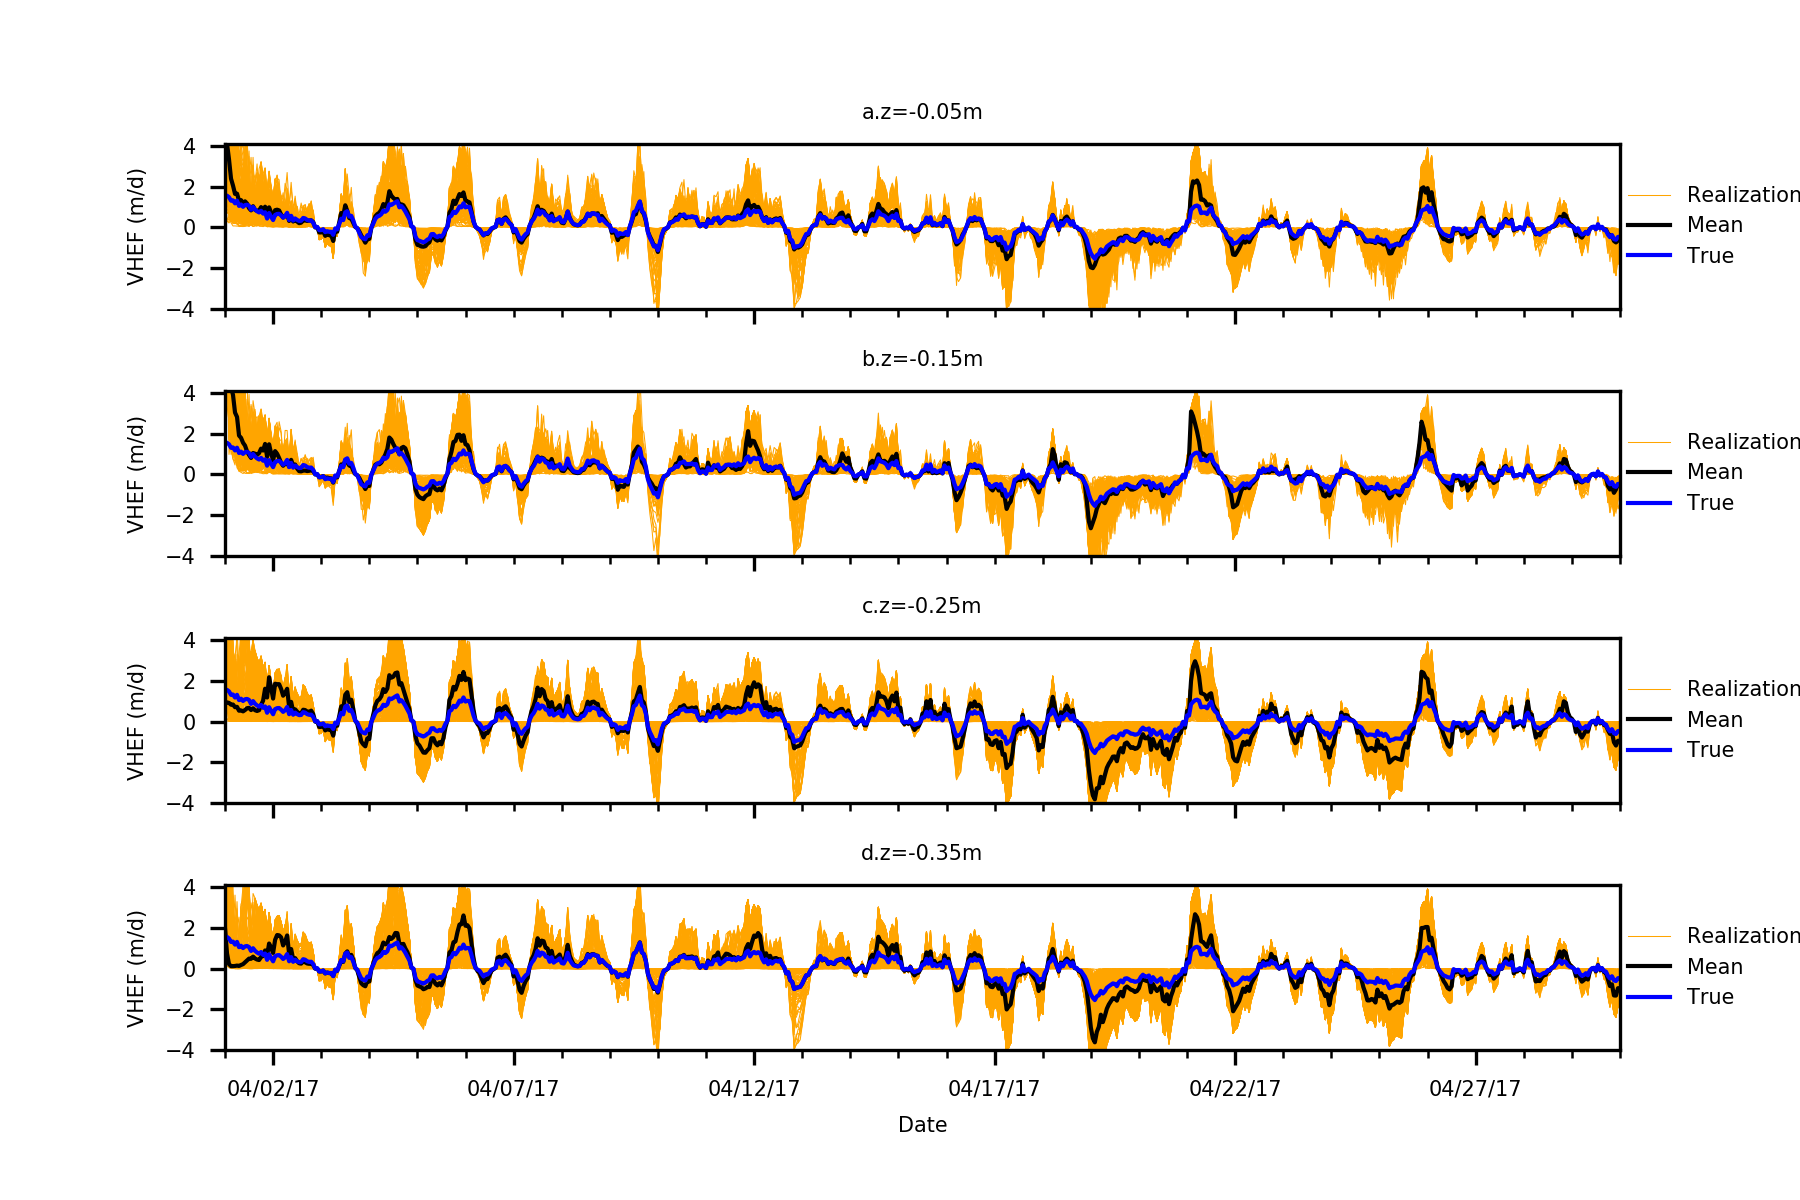

In [479]:
print("Disturbed K")
Image('./figure/single_sensor_dis_4.1-5.1.png')


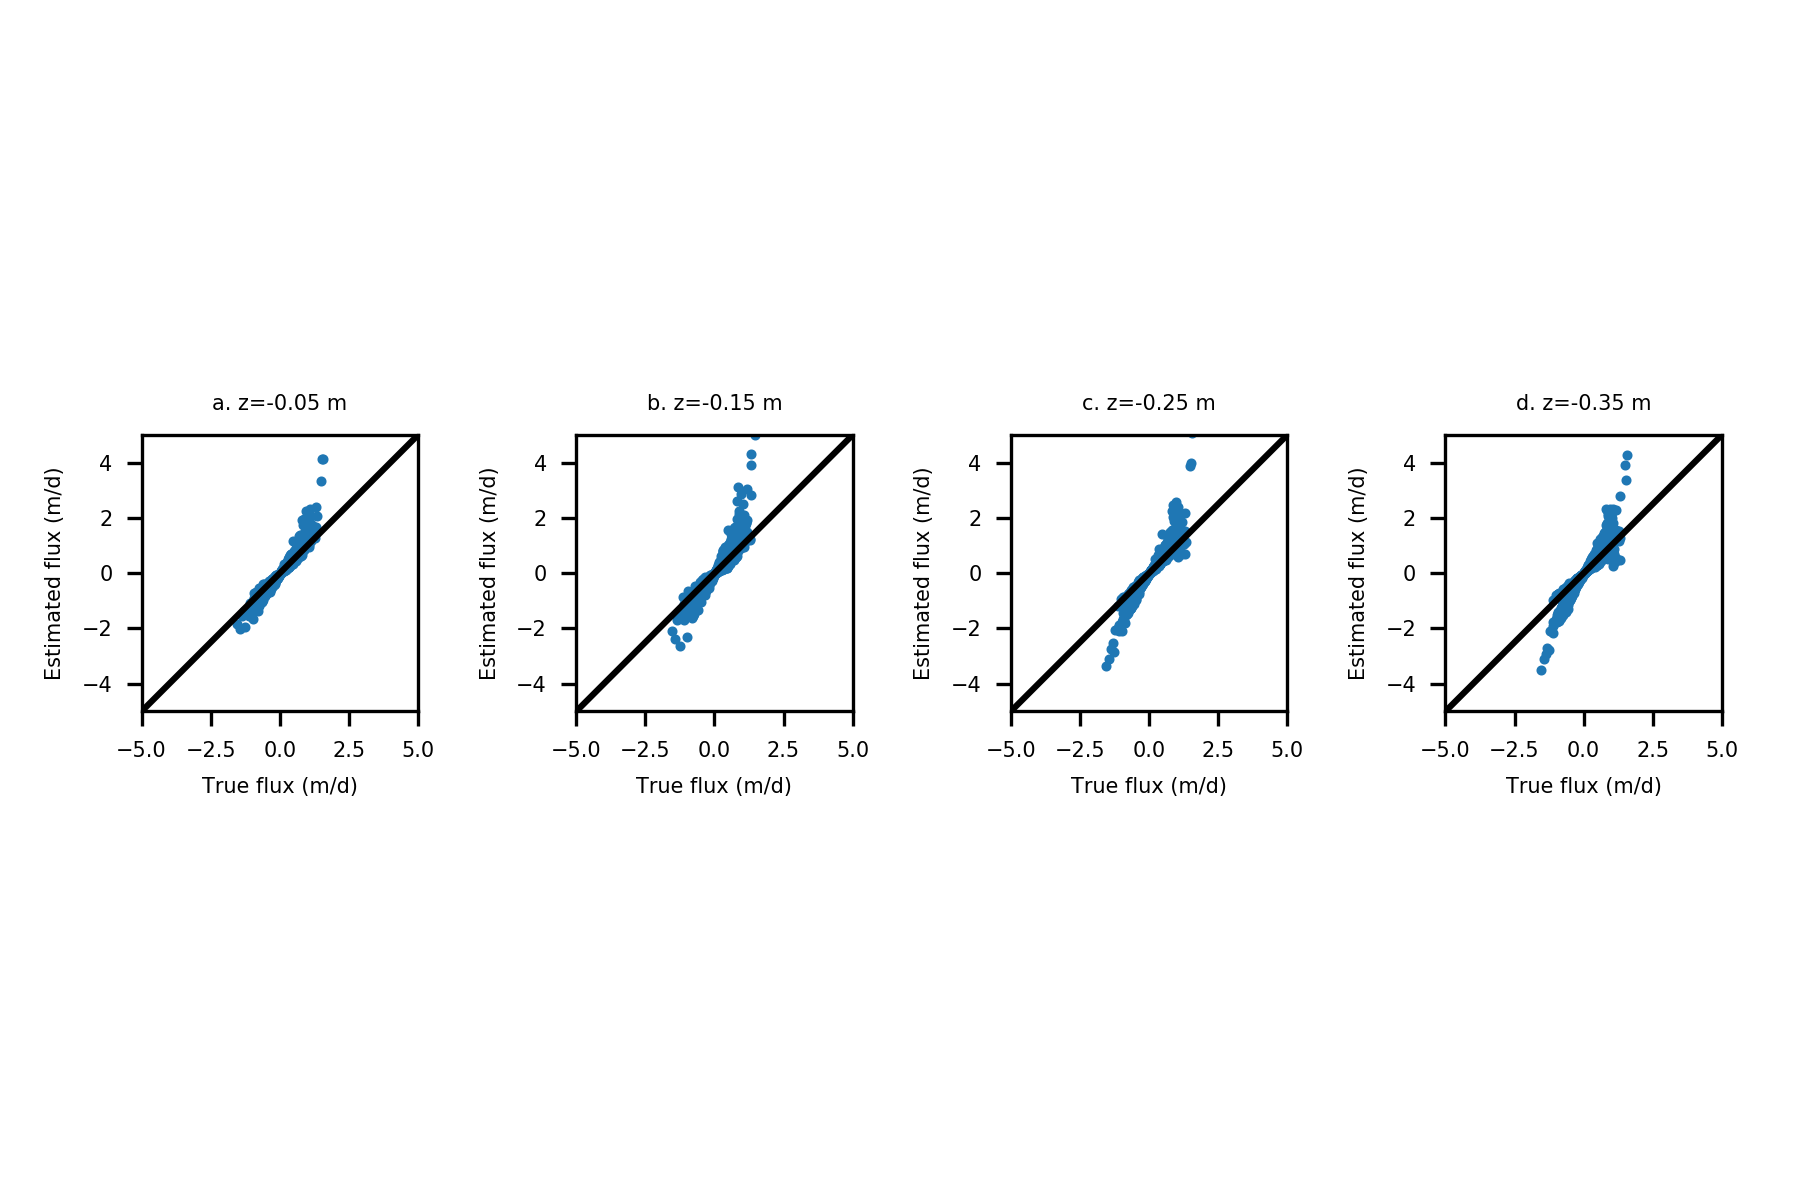

In [480]:
Image('./figure/flux correlation_dis.png')

undisturbed K


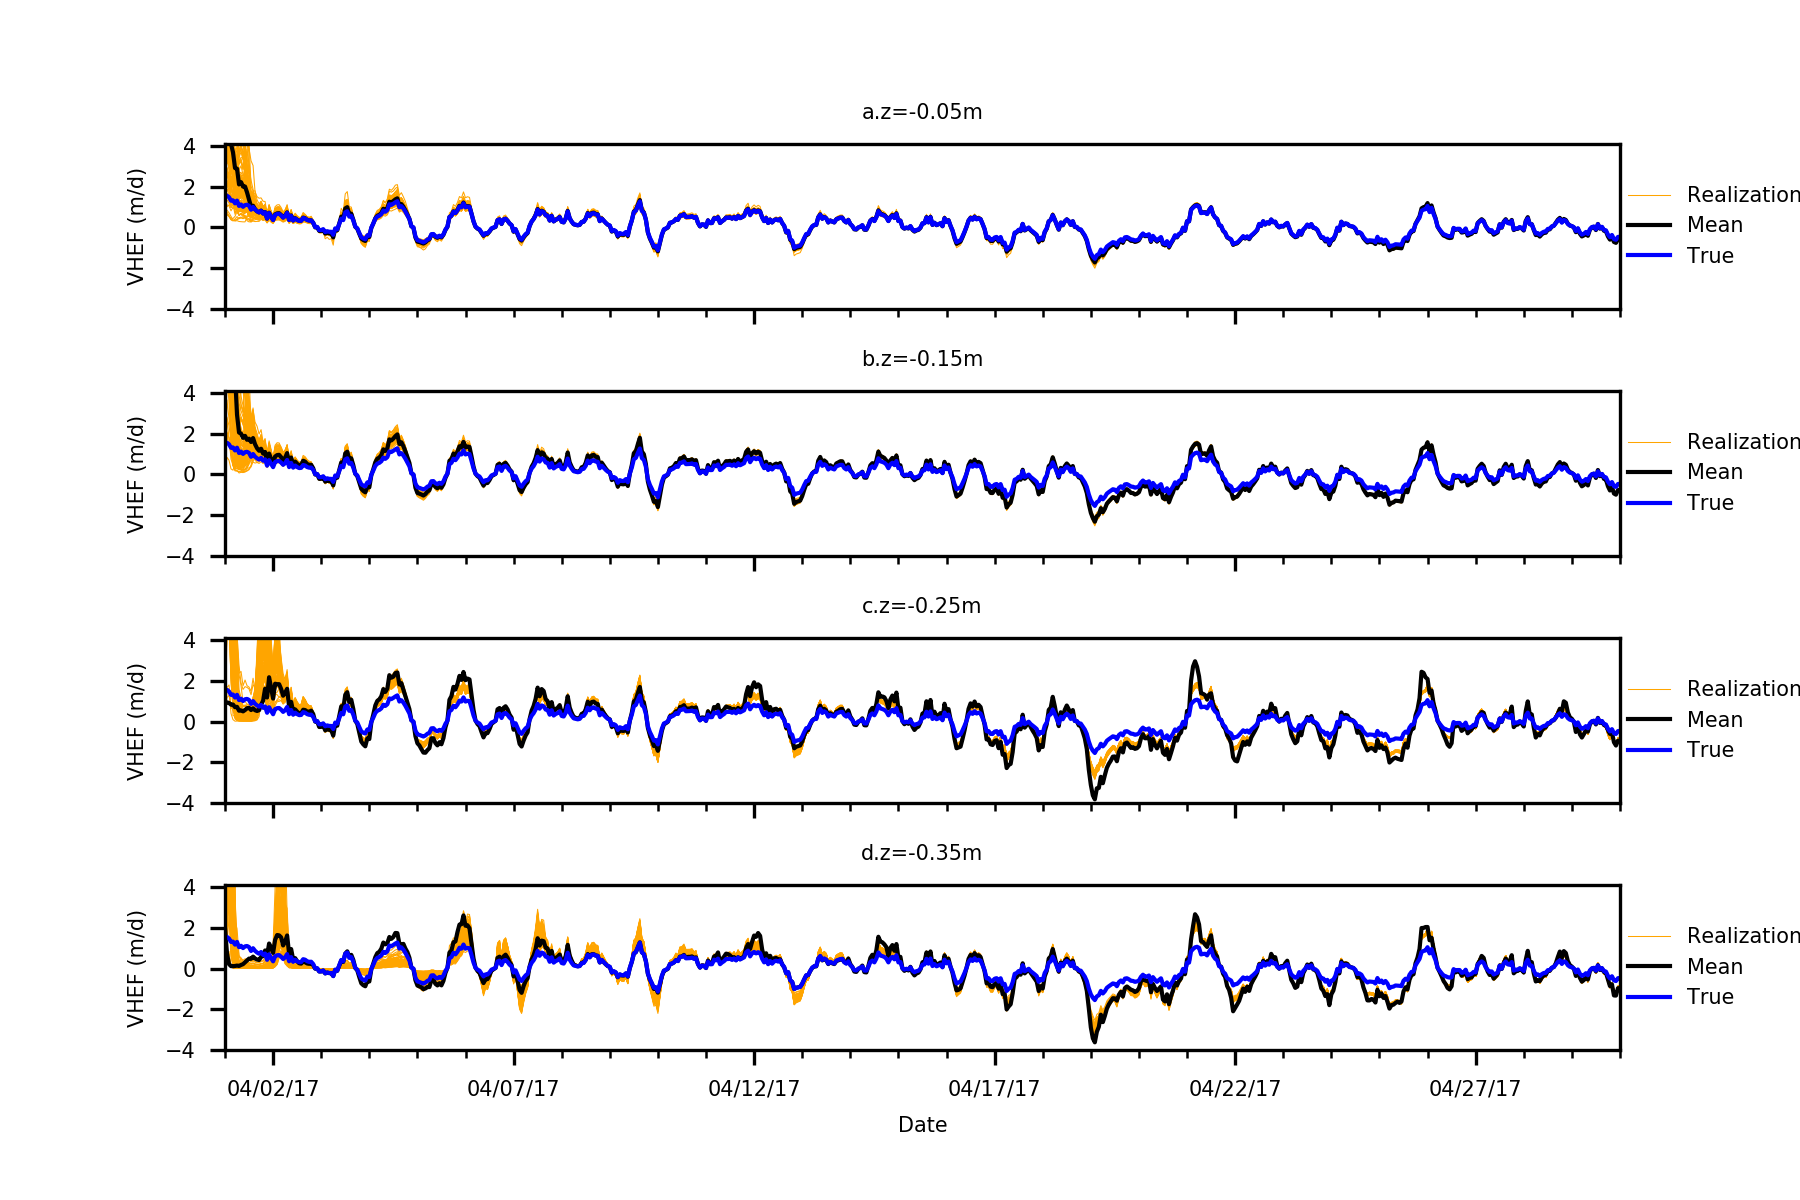

In [481]:
print("undisturbed K")
Image('./figure/single_sensor_undis_4.1-5.1.png')


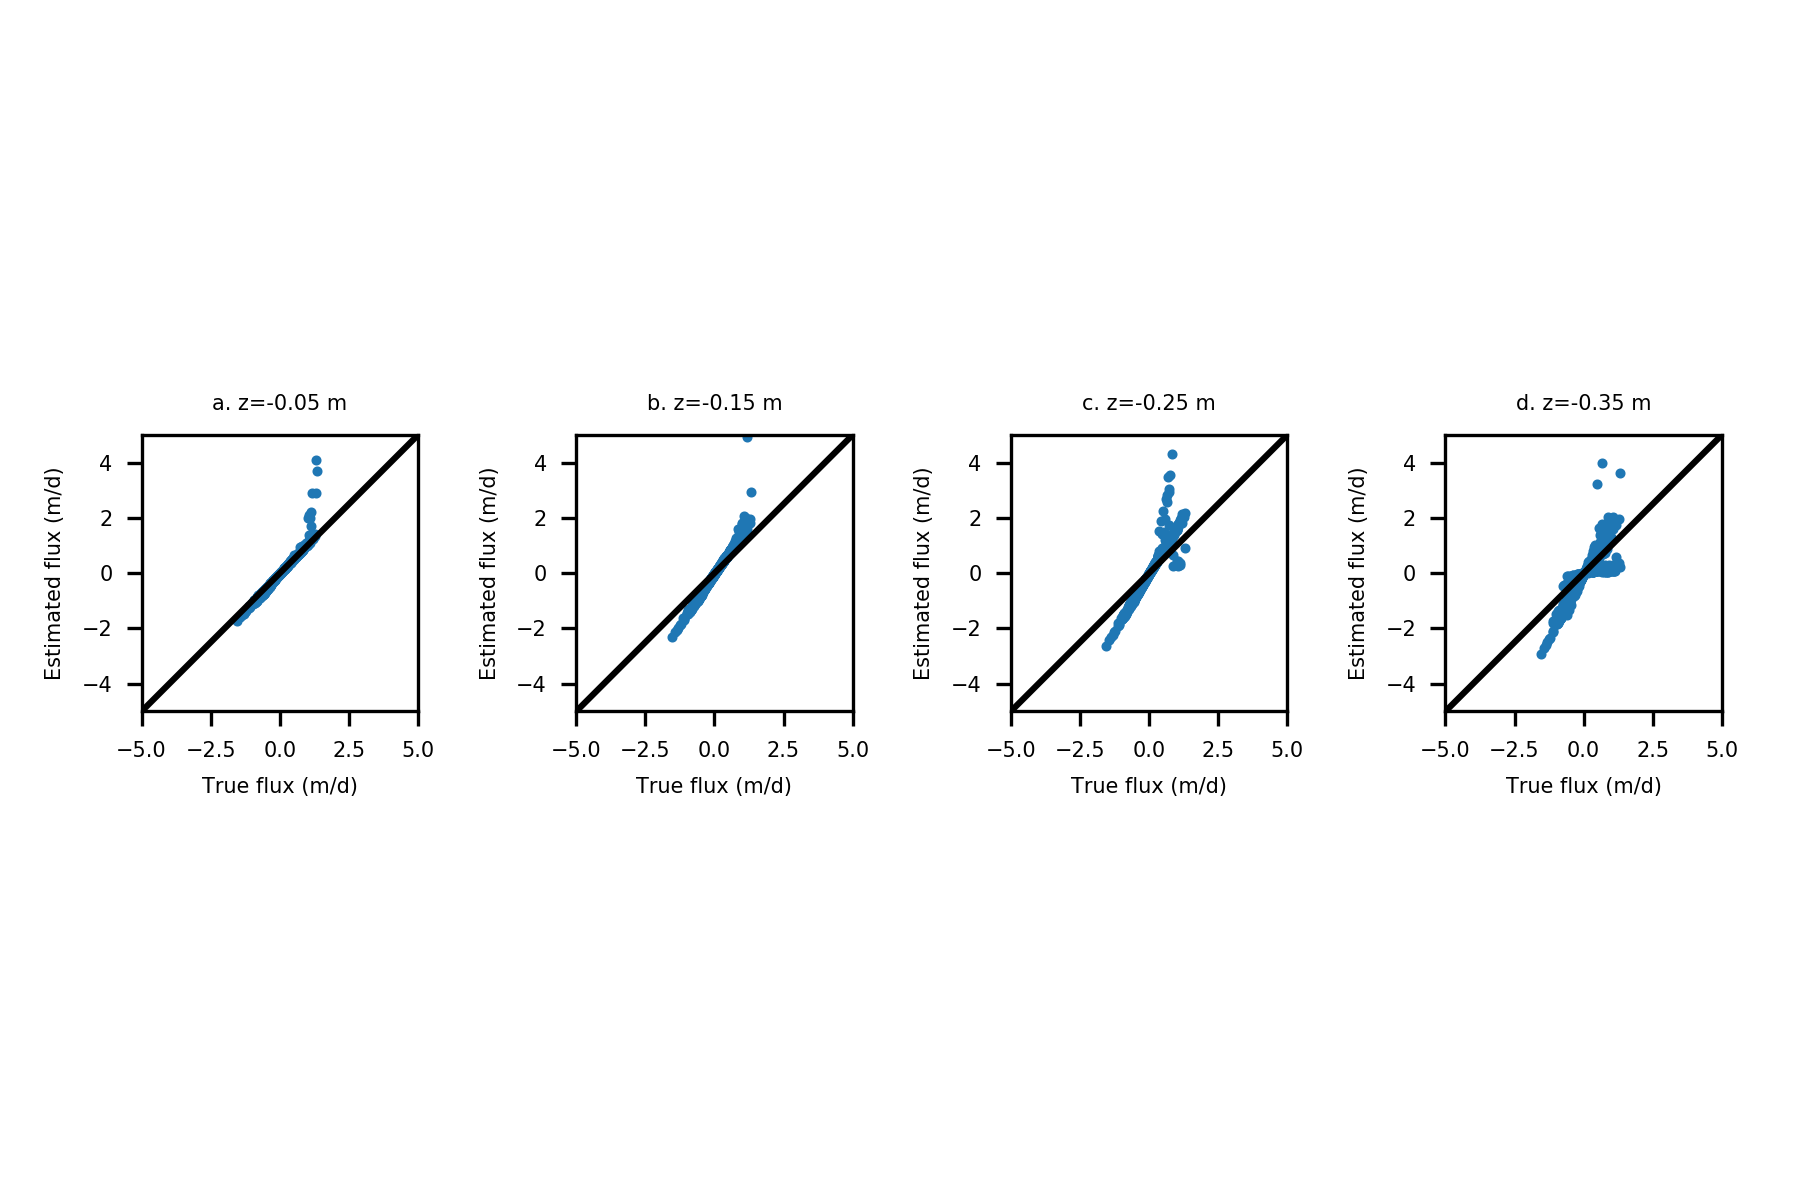

In [482]:
Image('./figure/flux correlation_undis.png')

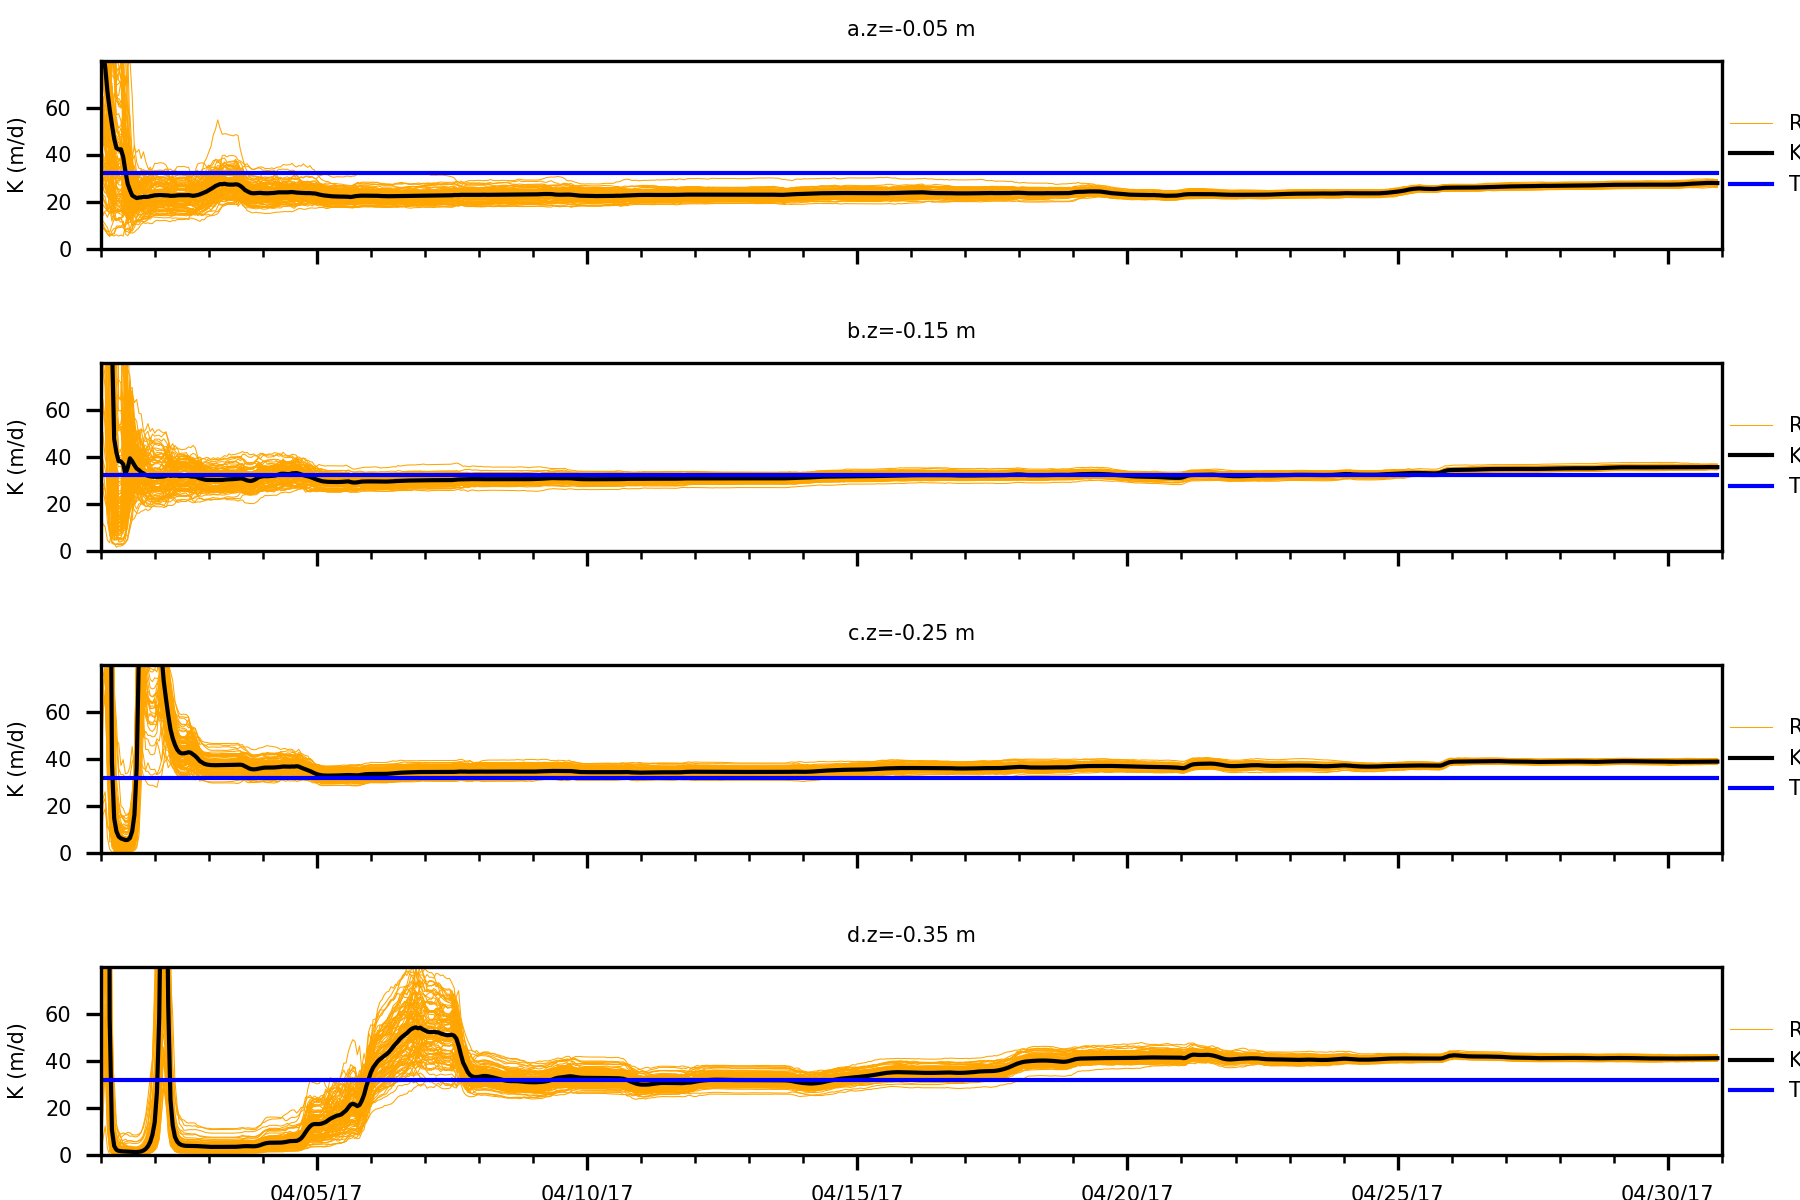

In [490]:
Image('./figure/K_evolution.png')

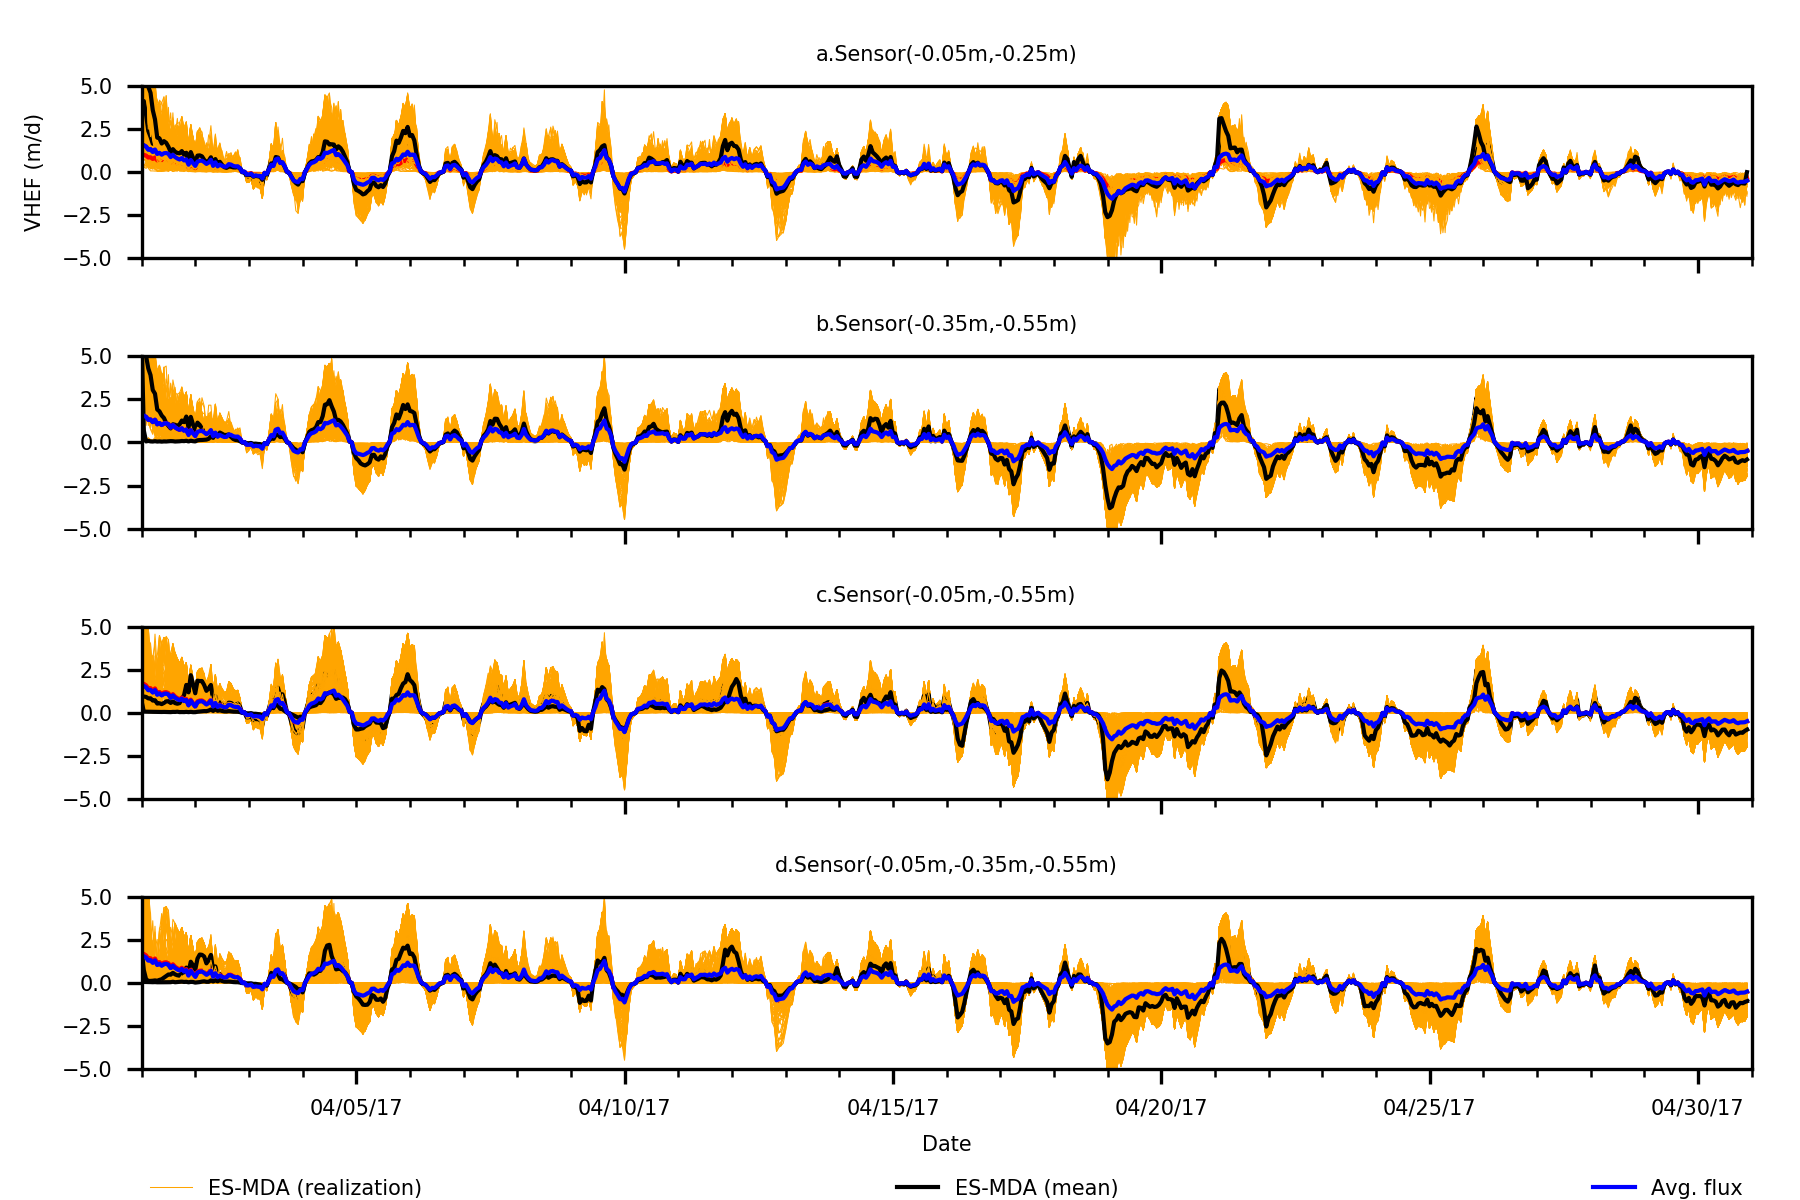

In [465]:
Image('./figure/multi_sensor_4.1-5.1.png')


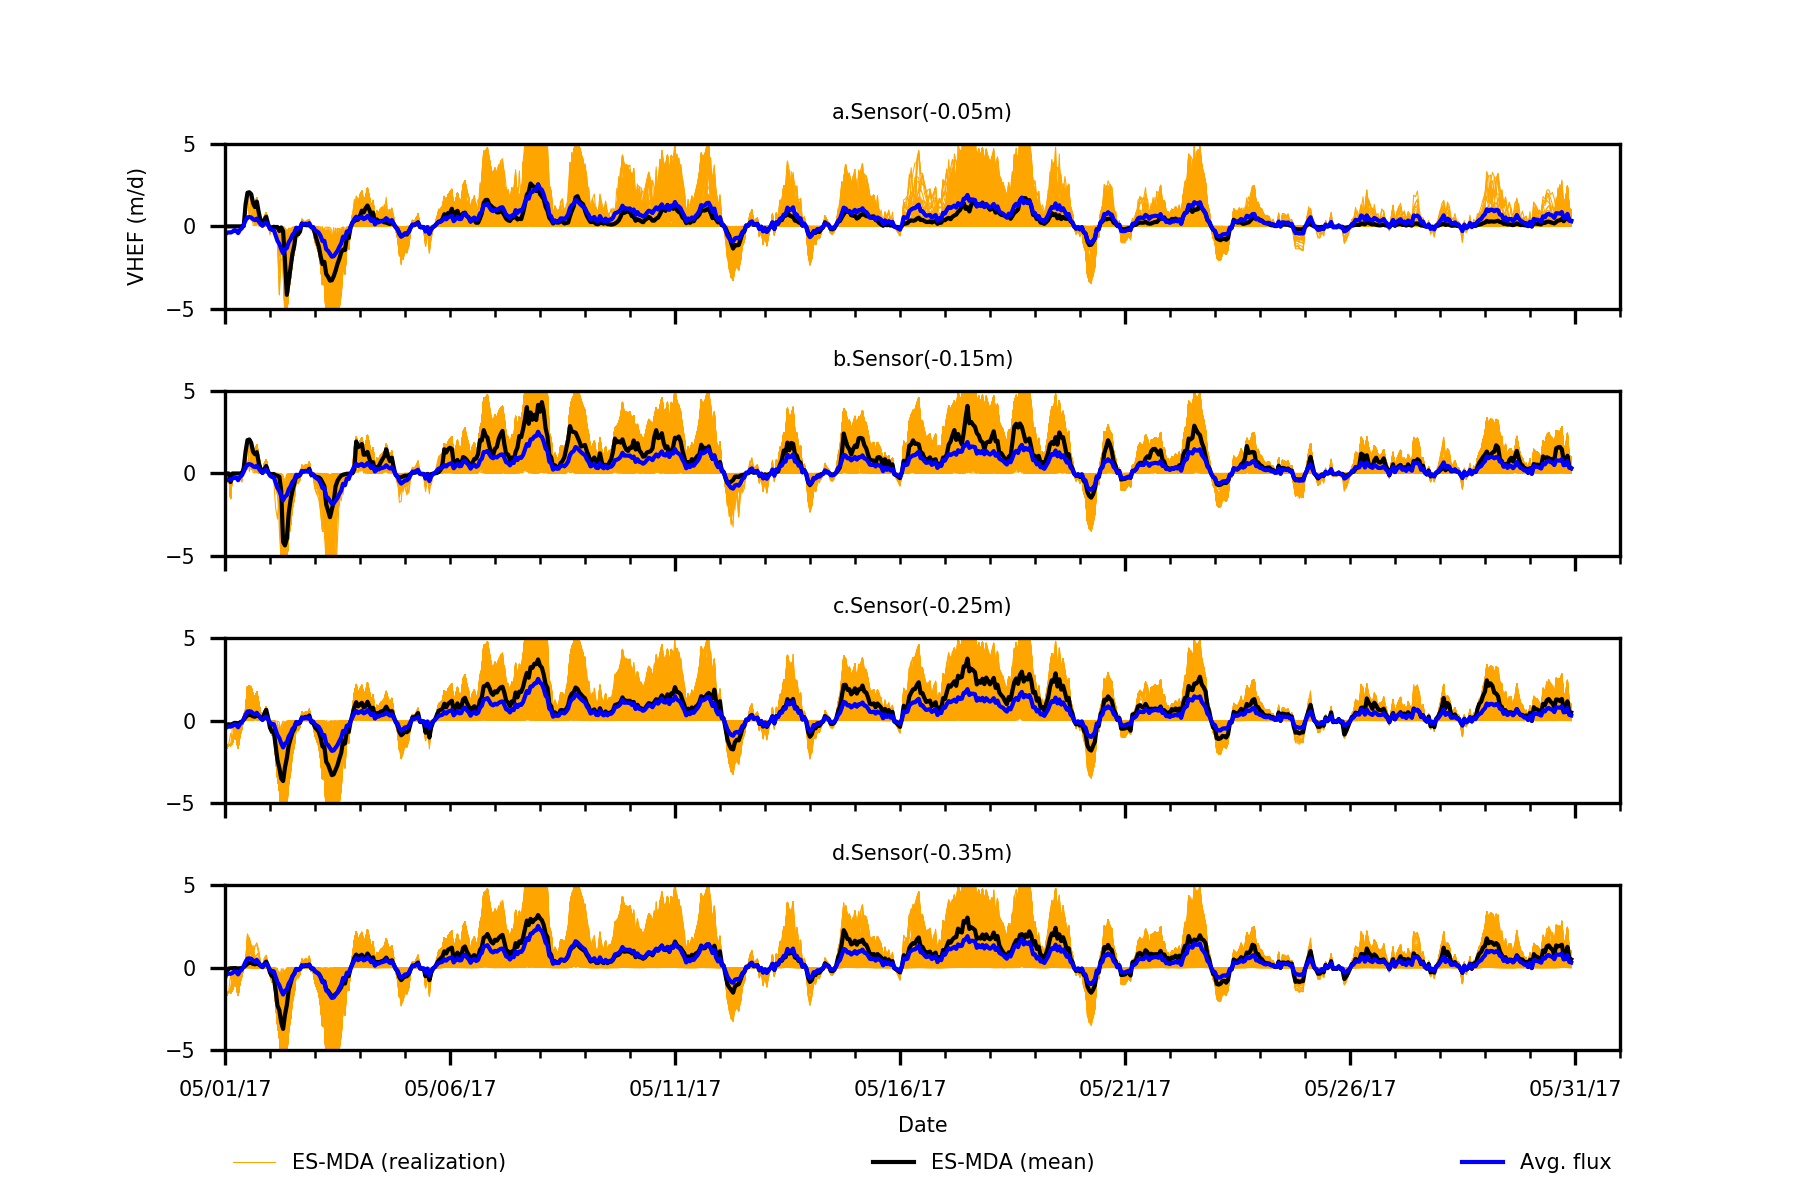

In [301]:
Image('./figure/single_sensor_5.1-6.1.png')

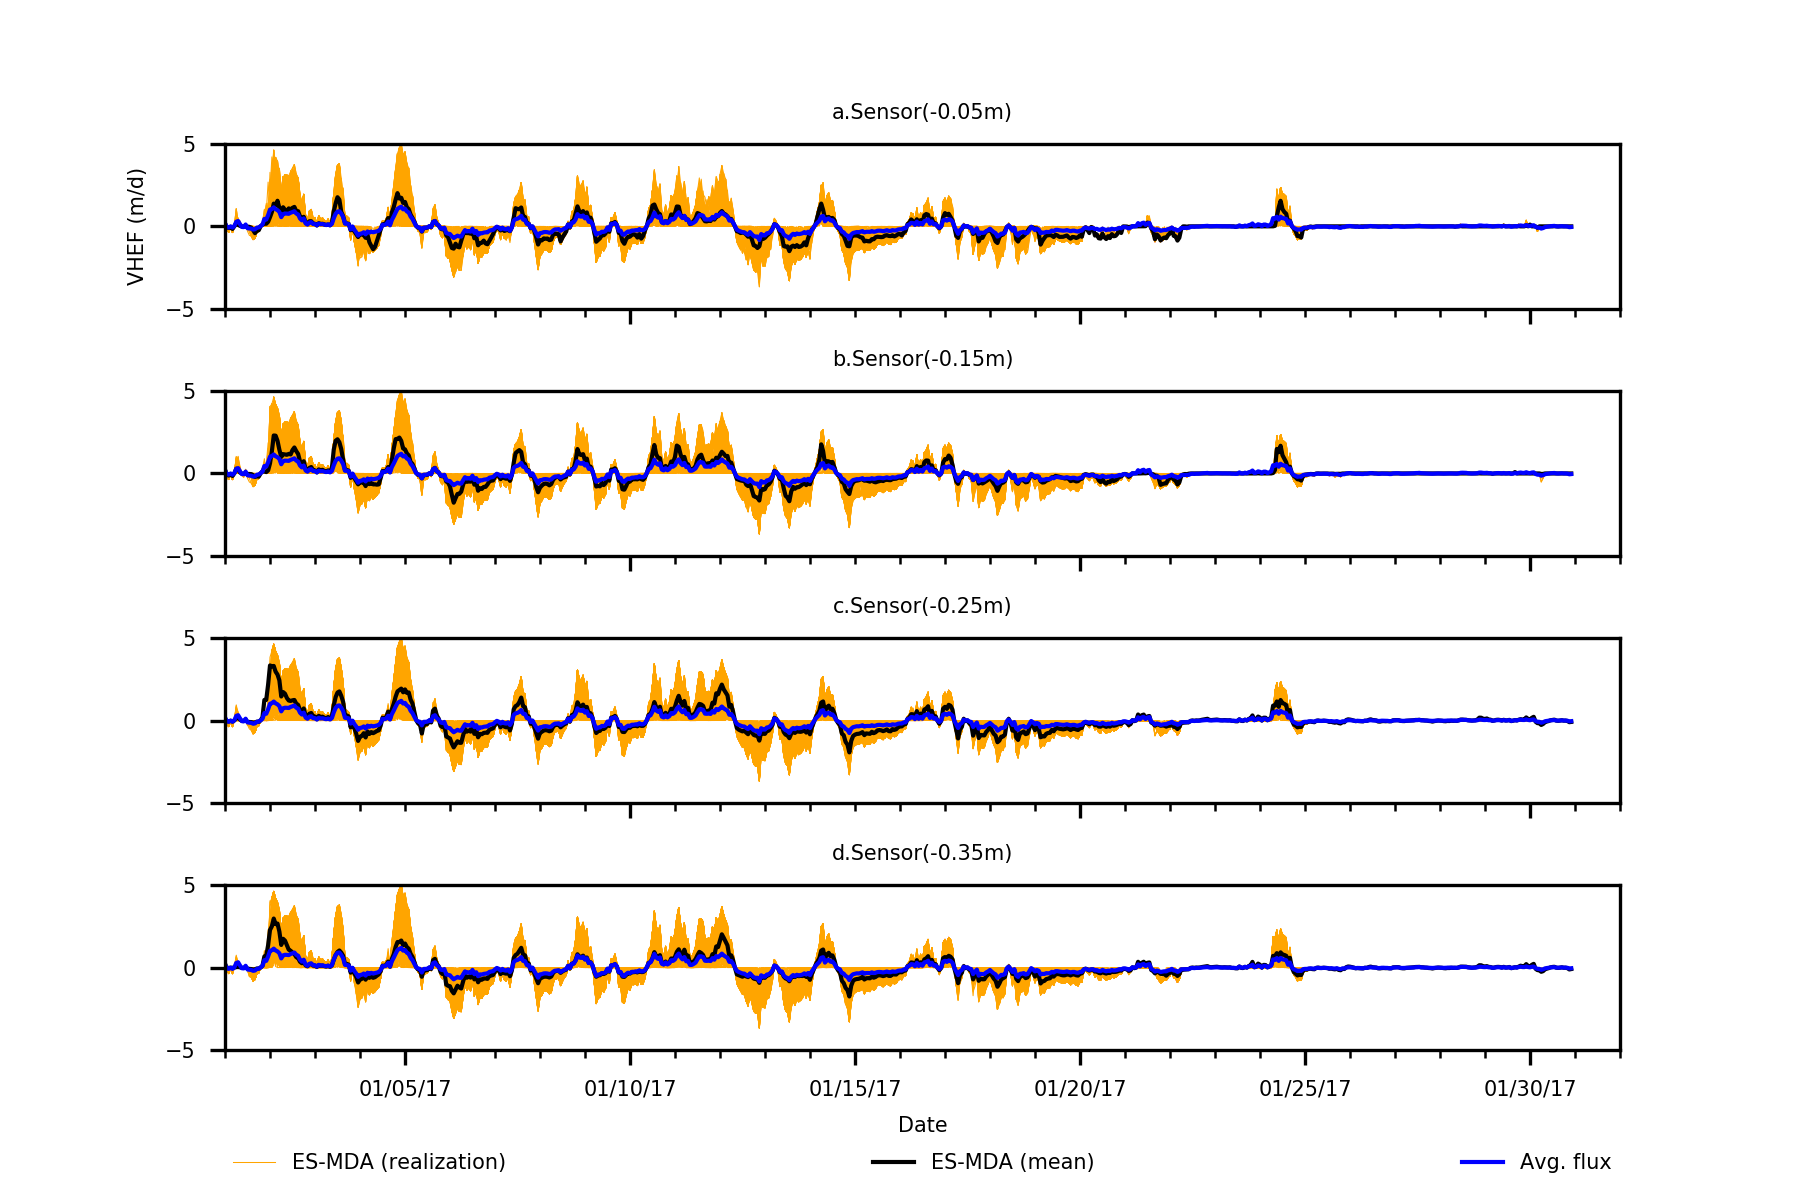

In [299]:
Image('./figure/single_sensor_1.1-2.1.png')

<a id='part 3.3'></a>
# 3.3 Frequency of Data collecting 
Frequencies of data collecting at the inverval of 1 h, 2h, 4h and 8 h are compared.


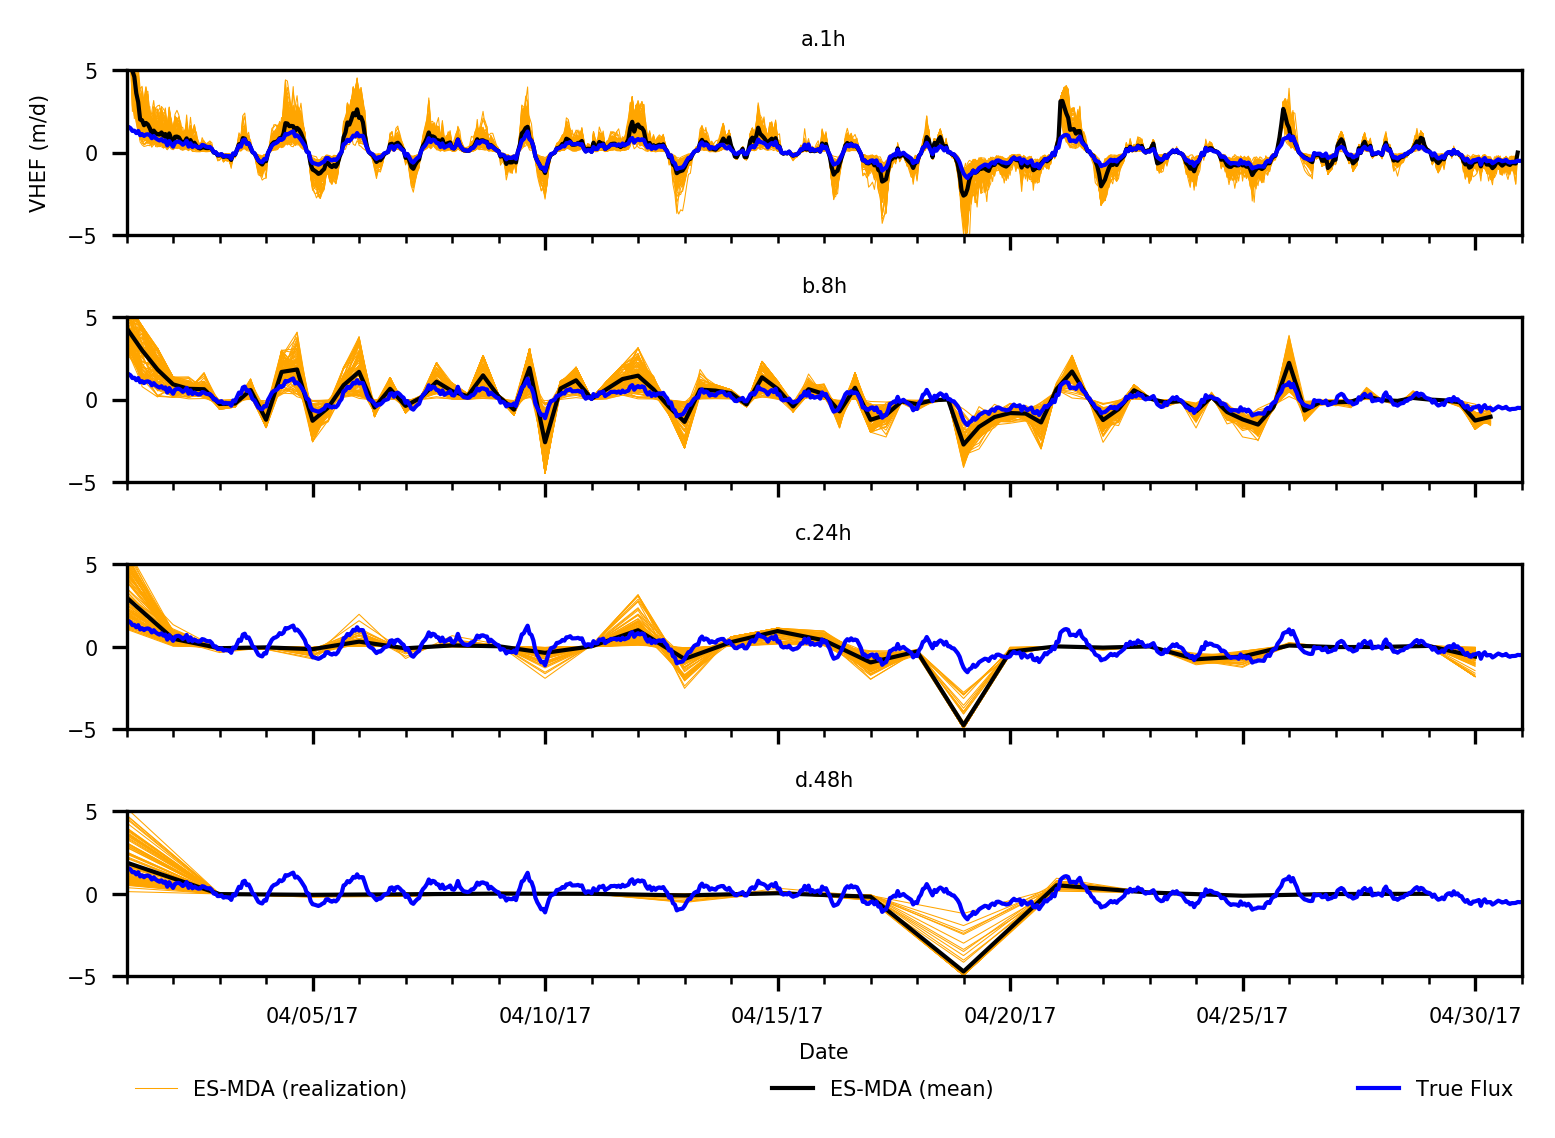

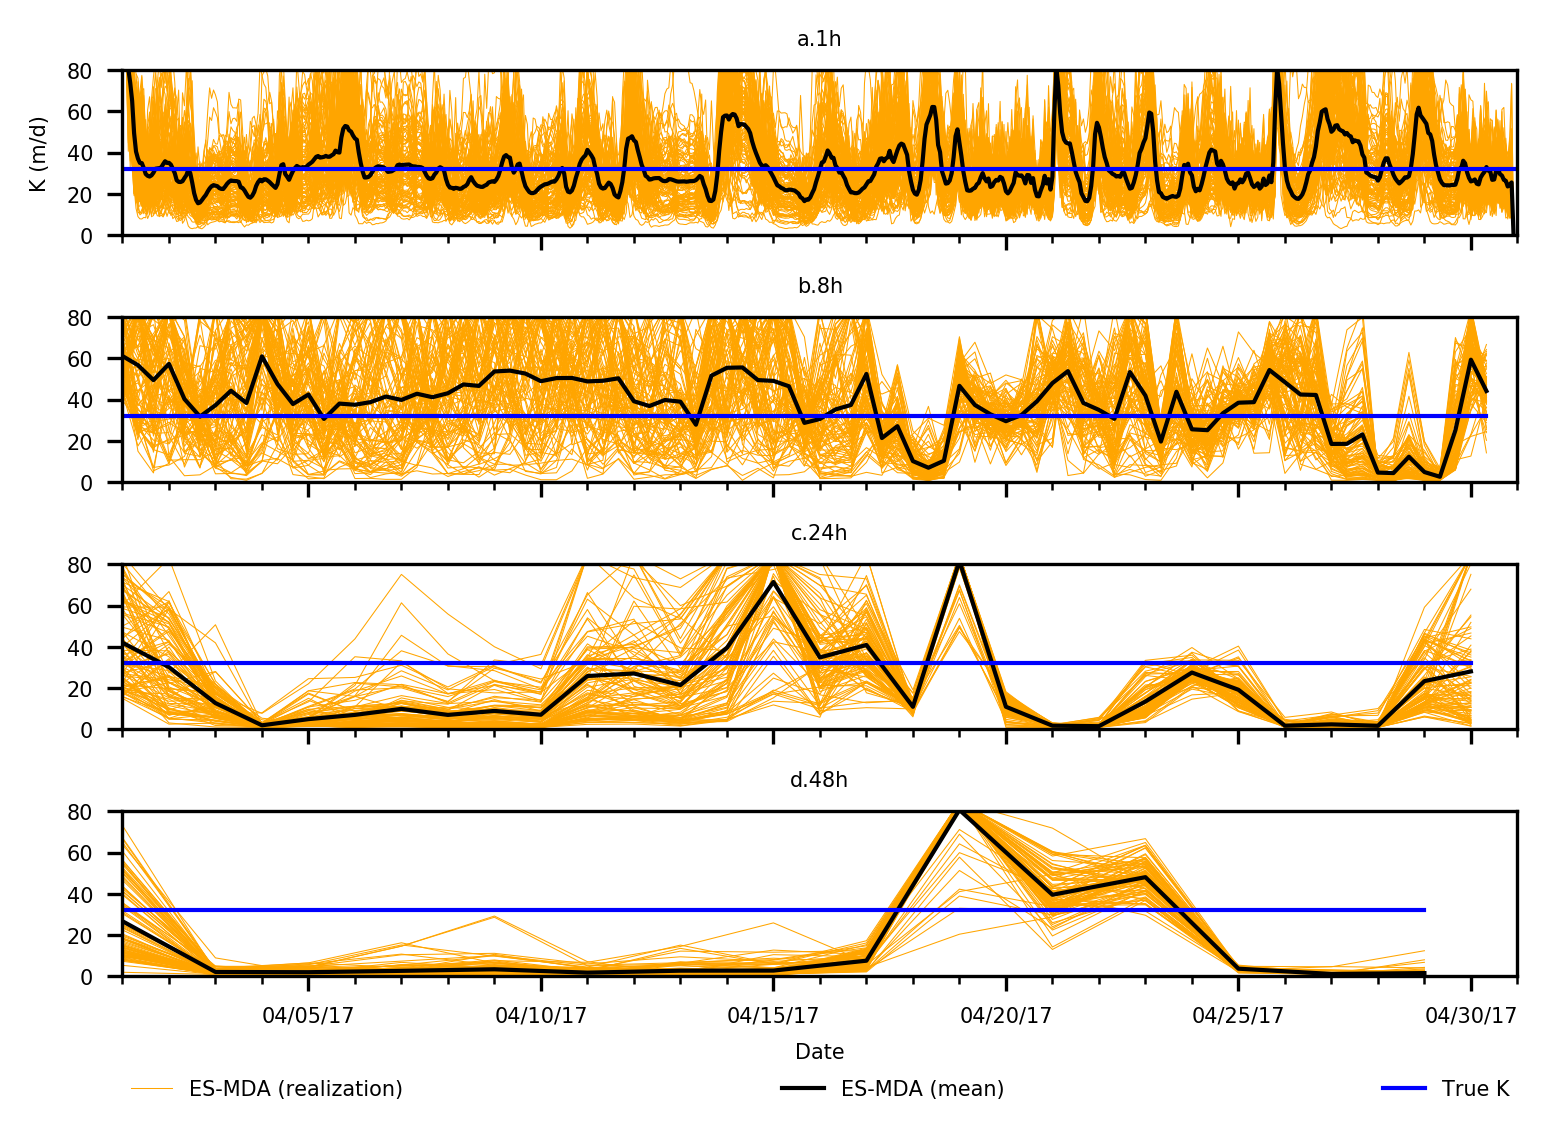

In [195]:
def PlotFreqDataCol(path_to_perm_BC14_Obs23_1h,path_to_perm_BC14_Obs23_8h,path_to_perm_BC14_Obs23_24h,path_to_perm_BC14_Obs23_48h,path_to_true_flux_1h,path_to_true_flux_8h,path_to_true_flux_24h,path_to_true_flux_48h):
    perm_BC14_Obs23_1h = np.loadtxt(path_to_perm_BC14_Obs23_1h,dtype=float)
    perm_BC14_Obs23_8h = np.loadtxt(path_to_perm_BC14_Obs23_8h,dtype=float)
    perm_BC14_Obs23_24h = np.loadtxt(path_to_perm_BC14_Obs23_24h,dtype=float)
    perm_BC14_Obs23_48h = np.loadtxt(path_to_perm_BC14_Obs23_48h,dtype=float)
    
    hy_cond_BC14_Obs23_1h = perm_BC14_Obs23_1h*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_8h = perm_BC14_Obs23_8h*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_24h = perm_BC14_Obs23_24h*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_48h = perm_BC14_Obs23_48h*1e6*9.8*3600*24
    true_hy_cond =32
    
    true_flux_1h = pd.read_csv(path_to_true_flux_1h,sep=',',header=0)
    true_flux_1h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_1h['time']]
    dt_1h = true_flux_1h['time']
    dt_1h = [mdates.date2num(x) for x in dt_1h]
    true_flux_8h = pd.read_csv(path_to_true_flux_8h,sep=',',header=0)
    true_flux_8h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_8h['time']]
    dt_8h = true_flux_8h['time']
    dt_8h = [mdates.date2num(x) for x in dt_8h]
    true_flux_24h = pd.read_csv(path_to_true_flux_24h,sep=',',header=0)
    true_flux_24h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_24h['time']]
    dt_24h = true_flux_24h['time']
    dt_24h = [mdates.date2num(x) for x in dt_24h]
    true_flux_48h = pd.read_csv(path_to_true_flux_48h,sep=',',header=0)
    true_flux_48h['time'] = [datetime.strptime(x,"%m/%d/%y %H:%M") for x in true_flux_48h['time']]
    dt_48h = true_flux_48h['time']
    dt_48h = [mdates.date2num(x) for x in dt_48h]
    
    ntime_1h = perm_BC14_Obs23_1h.shape[0]-1
    ntime_8h = perm_BC14_Obs23_8h.shape[0]-1   
    ntime_24h = perm_BC14_Obs23_24h.shape[0]-1
    ntime_48h = perm_BC14_Obs23_48h.shape[0]-1    
    ntime = len(dt_1h)
    nreaz = perm_BC14_Obs23_1h.shape[1] 
    fsize = 5
                
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(411)
    line1, = plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,0]*(true_flux_1h['hy_grad'].values[0:ntime_1h]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,i]*(true_flux_1h['hy_grad'].values[0:ntime_1h]),'orange',linewidth=0.25)
    line2, = plt.plot(dt_1h[0:ntime_1h],np.mean(hy_cond_BC14_Obs23_1h[0:ntime_1h,:],axis=1)*(true_flux_1h['hy_grad'].values[0:ntime_1h]),'k-',linewidth=1)       
    line3, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("a.1h",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


    plt.subplot(412)
    line10, = plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,0]*(true_flux_8h['hy_grad'].values[0:ntime_8h]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,i]*(true_flux_8h['hy_grad'].values[0:ntime_8h]),'orange',linewidth=0.25)
    line11, = plt.plot(dt_8h[0:ntime_8h],np.mean(hy_cond_BC14_Obs23_8h[0:ntime_8h,:],axis=1)*(true_flux_8h['hy_grad'].values[0:ntime_8h]),'k-',linewidth=1)       
    line12, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("b.8h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.subplot(413)
    line13, = plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,0]*(true_flux_24h['hy_grad'].values[0:30]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,i]*(true_flux_24h['hy_grad'].values[0:30]),'orange',linewidth=0.25)
    line14, = plt.plot(dt_24h[0:30],np.mean(hy_cond_BC14_Obs23_24h[0:30,:],axis=1)*(true_flux_24h['hy_grad'].values[0:30]),'k-',linewidth=1)       
    line15, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("c.24h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])

    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


    plt.subplot(414)
    line16, = plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,0]*(true_flux_48h['hy_grad'].values[0:15]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,i]*(true_flux_48h['hy_grad'].values[0:15]),'orange',linewidth=0.25)
    line17, = plt.plot(dt_48h[0:15],np.mean(hy_cond_BC14_Obs23_48h[0:15,:],axis=1)*(true_flux_48h['hy_grad'].values[0:15]),'k-',linewidth=1)       
    line18, = plt.plot(dt_1h[0:ntime],-true_flux_1h['true_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("d.48h",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True Flux'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    plt.tick_params(axis='both', which='major', labelsize=fsize)

#    plt.savefig('./figure/sensorconfig.png')
    plt.show()    

    ############################################################################################################################    

#                                                 Plot K

    ########################################################################################################################
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(411)
    line1, = plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_1h[0:ntime_1h],hy_cond_BC14_Obs23_1h[0:ntime_1h,i],'orange',linewidth=0.25)
    line2, = plt.plot(dt_1h[0:ntime_1h],np.mean(hy_cond_BC14_Obs23_1h[0:ntime_1h,:],axis=1),'k-',linewidth=1)       
    line3, = plt.plot(dt_1h[0:ntime_1h],np.ones((ntime_1h,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("a.1h",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("K (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))
    
    plt.subplot(412)
    line10, = plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_8h[0:ntime_8h],hy_cond_BC14_Obs23_8h[0:ntime_8h,i],'orange',linewidth=0.25)
    line11, = plt.plot(dt_8h[0:ntime_8h],np.mean(hy_cond_BC14_Obs23_8h[0:ntime_8h,:],axis=1),'k-',linewidth=1)       
    line12, = plt.plot(dt_8h[0:ntime_8h],np.ones((ntime_8h,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("b.8h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

    plt.subplot(413)
    line13, = plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_24h[0:30],hy_cond_BC14_Obs23_24h[0:30,i],'orange',linewidth=0.25)
    line14, = plt.plot(dt_24h[0:30],np.mean(hy_cond_BC14_Obs23_24h[0:30,:],axis=1),'k-',linewidth=1)       
    line15, = plt.plot(dt_24h[0:30],np.ones((30,))*true_hy_cond,'b',linewidth=1)

    plt.title("c.24h",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])

    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))


    plt.subplot(414)
    line16, = plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt_48h[0:15],hy_cond_BC14_Obs23_48h[0:15,i],'orange',linewidth=0.25)
    line17, = plt.plot(dt_48h[0:15],np.mean(hy_cond_BC14_Obs23_48h[0:15,:],axis=1),'k-',linewidth=1)       
    line18, = plt.plot(dt_48h[0:15],np.ones((15,))*true_hy_cond,'b',linewidth=1)
    plt.title("d.48h",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True K'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

#    plt.savefig('./figure/sensorconfig.png')
    plt.show() 
PlotFreqDataCol('./figure/perm_BC14_Obs23_1h.txt','./figure/perm_BC14_Obs23_8h.txt','./figure/perm_BC14_Obs23_24h.txt','./figure/perm_BC14_Obs23_48h.txt','./dainput/true_flux_1h.csv','./dainput/true_flux_8h.csv','./dainput/true_flux_24h.csv','./dainput/true_flux_48h.csv')



<a id='part 3.4'></a>
# 3.4 Number of iterations
Different number of iterations at each time step are tested

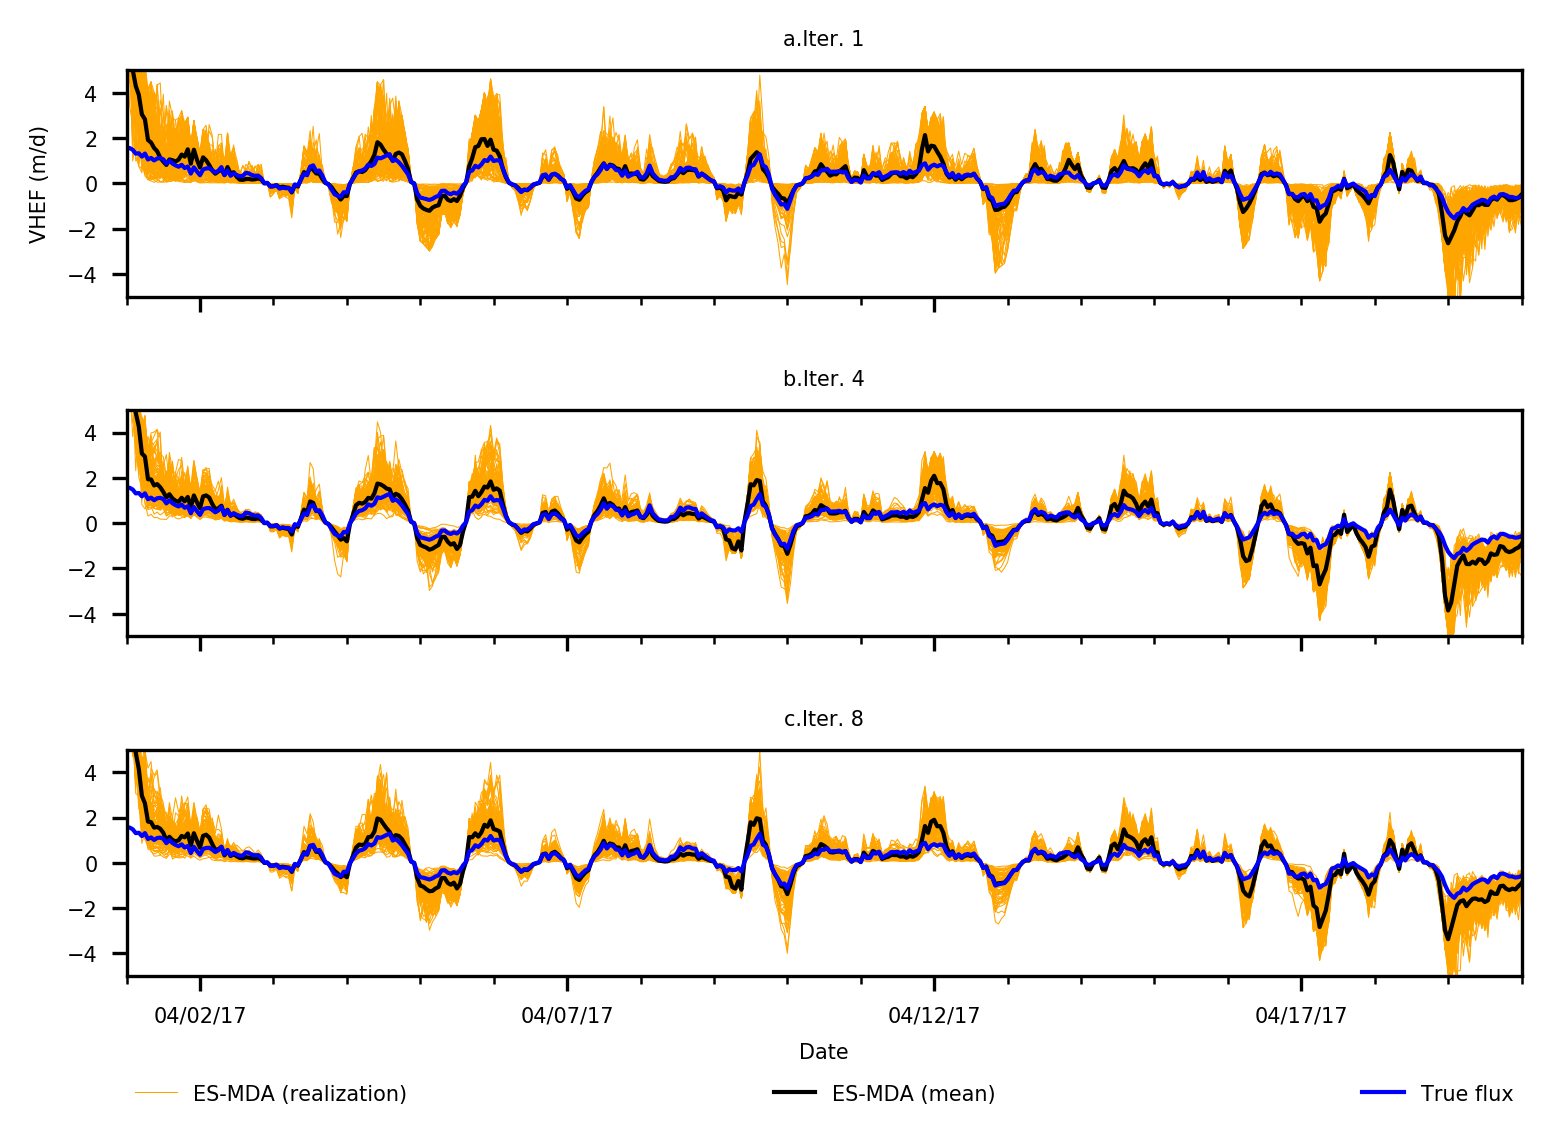

In [216]:
def PlotNumIter(path_to_perm_BC14_Obs23_iter1,path_to_perm_BC14_Obs23_iter2,path_to_perm_BC14_Obs23_iter4,path_to_true_flux):
    perm_BC14_Obs23_iter1 = np.loadtxt(path_to_perm_BC14_Obs23_iter1,dtype=float)
    perm_BC14_Obs23_iter2 = np.loadtxt(path_to_perm_BC14_Obs23_iter2,dtype=float)
    perm_BC14_Obs23_iter4 = np.loadtxt(path_to_perm_BC14_Obs23_iter4,dtype=float)
    hy_cond_BC14_Obs23_iter1 = perm_BC14_Obs23_iter1*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_iter2 = perm_BC14_Obs23_iter2*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_iter4 = perm_BC14_Obs23_iter4*1e6*9.8*3600*24

    true_flux = pd.read_csv('./dainput/true_flux.csv',sep=',',header=0)
    true_flux['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in true_flux['time']]
    dt = true_flux['time']
    dt = [mdates.date2num(x) for x in dt]
    ntime = perm_BC14_Obs23_iter1.shape[0]-1
    nreaz = perm_BC14_Obs23_iter1.shape[1] 
    ntime = 500
    fsize = 5
    
#    for i in range(nreaz):
#        for j in range(ntime-1):
#            print(j)
#            if (hy_cond_BC14_Obs23_iter1[j+1,i]/hy_cond_BC14_Obs23_iter1[j,i])>3:
#                hy_cond_BC14_Obs23_iter1[j+1,i] = hy_cond_BC14_Obs23_iter1[j,i]
#            if (hy_cond_BC14_Obs23_iter2[j+1,i]/hy_cond_BC14_Obs23_iter2[j,i])>3:
#                hy_cond_BC14_Obs23_iter2[j+1,i] = hy_cond_BC14_Obs23_iter2[j,i]            
#                print(i)
#            if (hy_cond_BC14_Obs23_iter4[j+1,i]/hy_cond_BC14_Obs23_iter4[j,i])>3:
#                hy_cond_BC14_Obs23_iter4[j+1,i] = hy_cond_BC14_Obs23_iter4[j,i]
                
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(311)
    line1, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter1[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter1[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line2, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_iter1[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line3, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("a.Iter. 1", fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)", fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,4,20)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    
    plt.subplot(312)
    line4, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter2[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter2[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line5, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_iter2[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line6, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("b.Iter. 4", fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,4,20)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])      
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.subplot(313)
    line7, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter4[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_iter4[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line8, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_iter4[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line9, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("c.Iter. 8", fontsize=fsize)
    plt.xlabel("Date", fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,4,20)])
    plt.ylim([-5,5])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,-0.6,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())  
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.savefig('./figure/sensorconfig.png')
    plt.show()
                        
PlotNumIter('./figure/perm_BC14_Obs23_iter1.txt','./figure/perm_BC14_Obs23_iter4.txt','./figure/perm_BC14_Obs23_iter8.txt','./dainput/true_flux.csv')

<a id='part 3.5'></a>
# 3.5 Initial Emsemble of Permeability


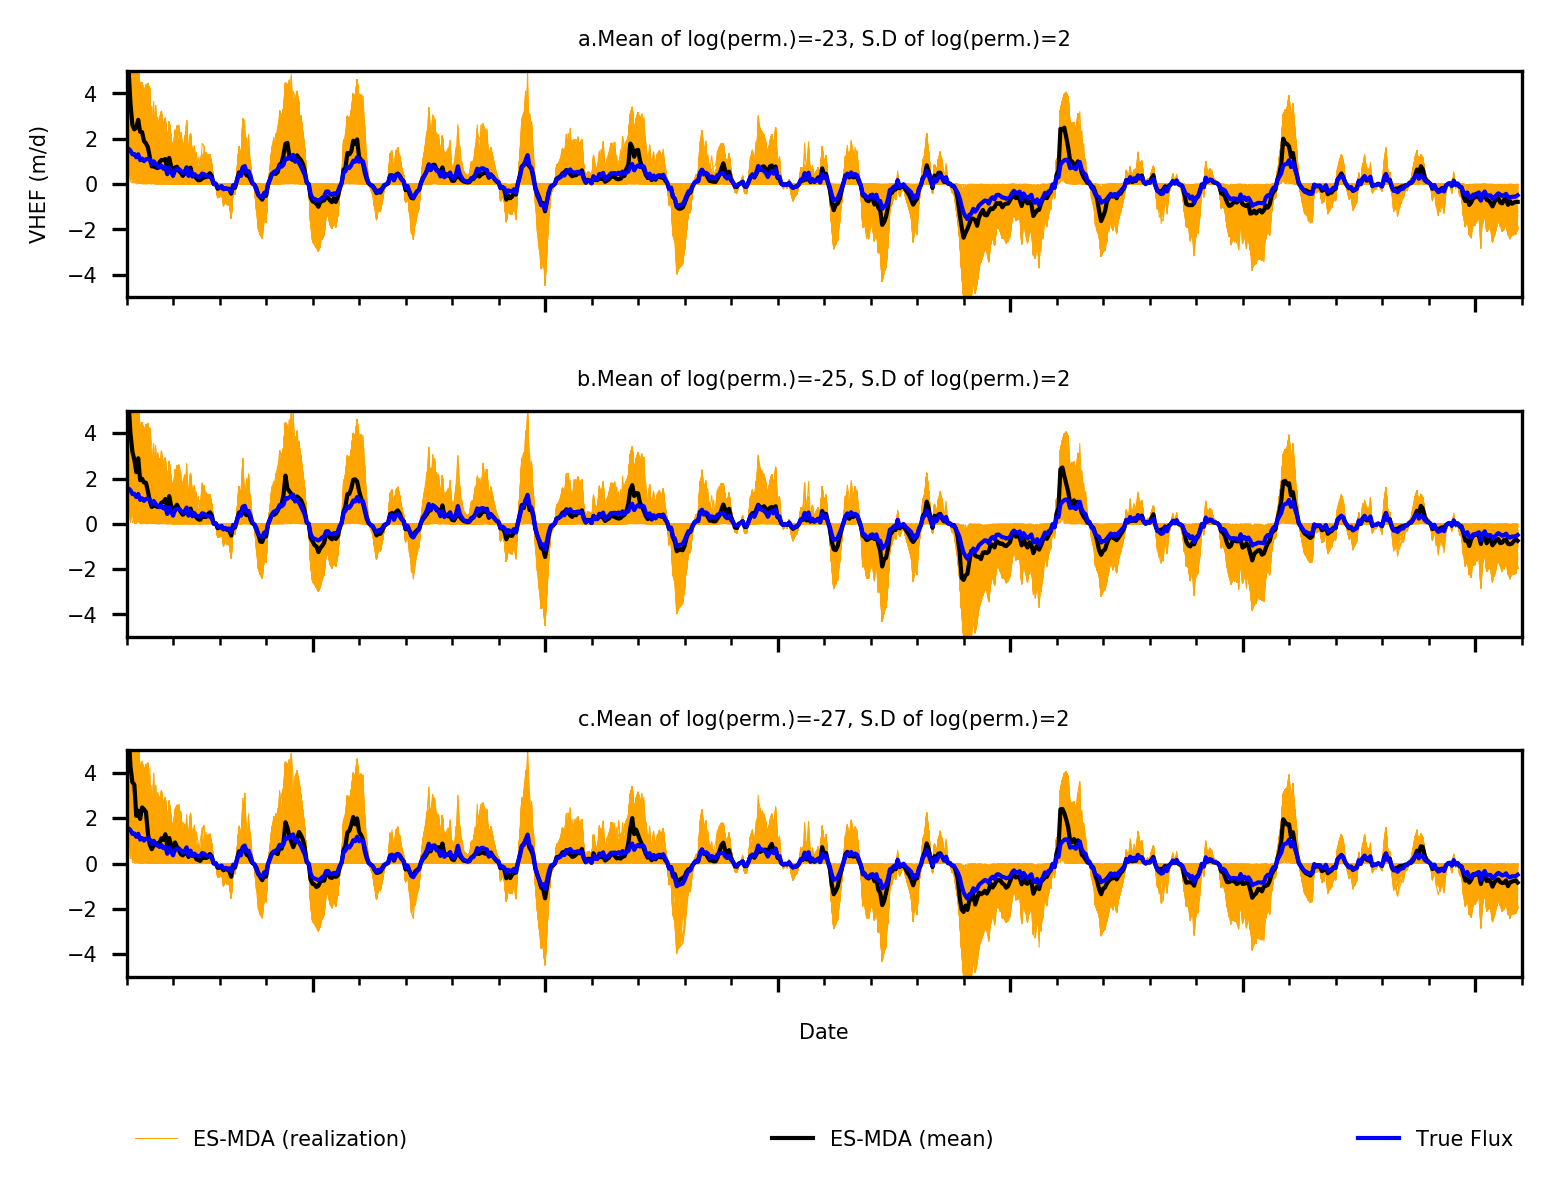

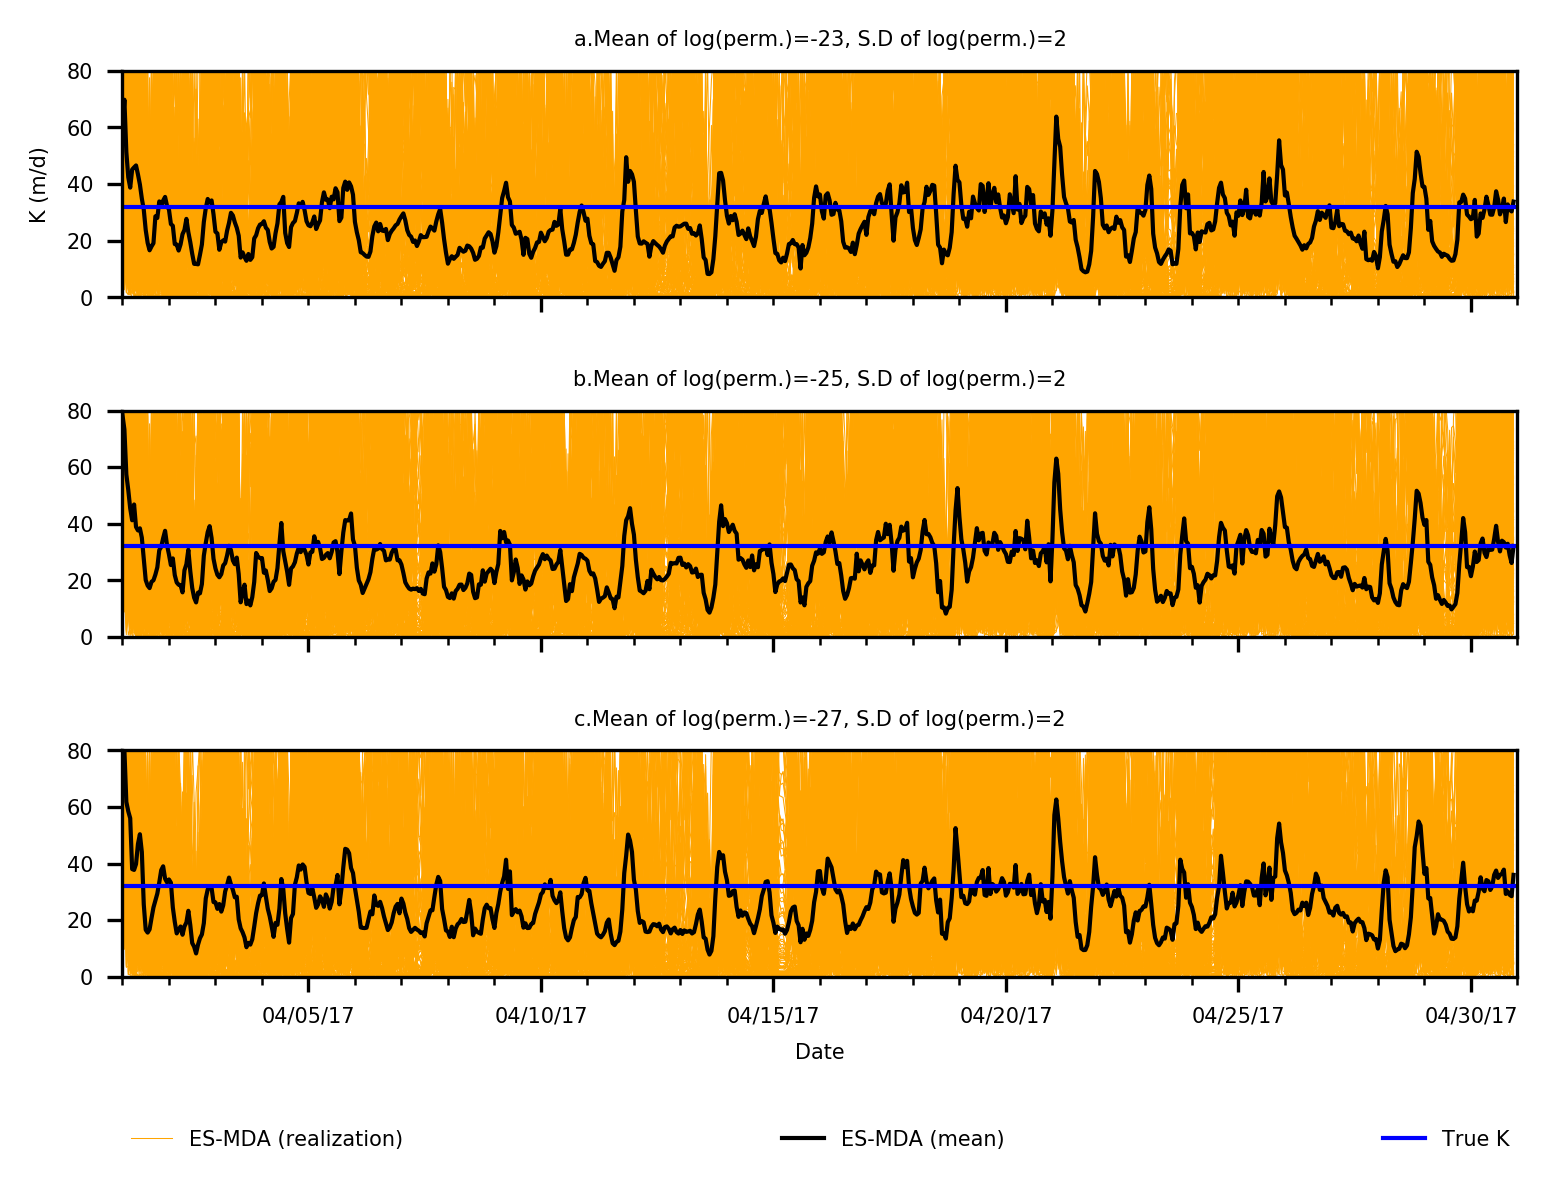

In [268]:
def PlotInitEmsPerm(path_to_perm_BC14_Obs23_prior23,path_to_perm_BC14_Obs23_prior25,path_to_perm_BC14_Obs23_prior27,path_to_true_flux):
    perm_BC14_Obs23_23 = np.loadtxt(path_to_perm_BC14_Obs23_prior23,dtype=float)
    perm_BC14_Obs23_25 = np.loadtxt(path_to_perm_BC14_Obs23_prior25,dtype=float)
    perm_BC14_Obs23_27 = np.loadtxt(path_to_perm_BC14_Obs23_prior27,dtype=float)
    
    hy_cond_BC14_Obs23_23 = perm_BC14_Obs23_23*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_25 = perm_BC14_Obs23_25*1e6*9.8*3600*24
    hy_cond_BC14_Obs23_27 = perm_BC14_Obs23_27*1e6*9.8*3600*24
    true_hy_cond =32

    ntime = perm_BC14_Obs23_23.shape[0]-1   
    nreaz = perm_BC14_Obs23_23.shape[1] 
    fsize = 5
    
#    for i in range(nreaz):
#        for j in range(ntime-1):
#            if (hy_cond_BC14_Obs23_21[j+1,i]/hy_cond_BC14_Obs23_21[j,i])>5:
#                hy_cond_BC14_Obs23_21[j+1,i] = hy_cond_BC14_Obs23_21[j,i]
#            if (hy_cond_BC14_Obs23_23[j+1,i]/hy_cond_BC14_Obs23_23[j,i])>8:
#                hy_cond_BC14_Obs23_23[j+1,i] = hy_cond_BC14_Obs23_23[j,i]            
#            if (hy_cond_BC14_Obs23_26[j+1,i]/hy_cond_BC14_Obs23_26[j,i])>5:
#                hy_cond_BC14_Obs23_26[j+1,i] = hy_cond_BC14_Obs23_26[j,i]    
    
    true_flux = pd.read_csv(path_to_true_flux,sep=',',header=0)
    true_flux['time'] = [datetime.strptime(x,"%m/%d/%Y %H:%M") for x in true_flux['time']]
    dt = true_flux['time']
    dt = [mdates.date2num(x) for x in dt]

                
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(311)
    line1, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line2, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_23[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line3, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("a.Mean of log(perm.)=-23, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("VHEF (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


    plt.subplot(312)
    line10, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_25[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_25[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line11, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_25[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line12, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("b.Mean of log(perm.)=-25, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)

    plt.subplot(313)
    line13, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_27[0:ntime,0]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_27[0:ntime,i]*(true_flux['hy_grad'].values[0:ntime]),'orange',linewidth=0.25)
    line14, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_27[0:ntime,:],axis=1)*(true_flux['hy_grad'].values[0:ntime]),'k-',linewidth=1)       
    line15, = plt.plot(dt[0:ntime],-true_flux['avg_flux'].values[0:ntime]*24,'b',linewidth=1)
    
    plt.title("c.Mean of log(perm.)=-27, S.D of log(perm.)=2",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([-5,5])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True Flux'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)

    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())    
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)


#    plt.savefig('./figure/sensorconfig.png')
    plt.show()    

    ############################################################################################################################    

#                                                 Plot K

    ########################################################################################################################
    fig = plt.figure(dpi=300)
    fig.subplots_adjust(hspace=.5)
    plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
    plt.subplot(311)
    line1, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_23[0:ntime,i],'orange',linewidth=0.25)
    line2, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_23[0:ntime,:],axis=1),'k-',linewidth=1)       
    line3, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("a.Mean of log(perm.)=-23, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
    plt.ylabel("K (m/d)",fontsize=fsize)
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=True,bbox_to_anchor=(0,0,1,0.102),loc=8,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=10)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
#    ax.axes.get_xaxis().set_visible(False)
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))
    
    plt.subplot(312)
    line10, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_25[0:ntime,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_25[0:ntime,i],'orange',linewidth=0.25)
    line11, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_25[0:ntime,:],axis=1),'k-',linewidth=1)       
    line12, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
    
    plt.title("b.Mean of log(perm.)=-25, S.D of log(perm.)=2",fontsize=fsize)
#    plt.xlabel("Date")
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
#    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True flux'),frameon=False,bbox_to_anchor=(0,0,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0.)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    ax.xaxis.set_ticklabels([])    
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

    plt.subplot(313)
    line16, = plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_27[0:ntime,0],'orange',linewidth=0.25)
    for i in range(1,nreaz-1):
        plt.plot(dt[0:ntime],hy_cond_BC14_Obs23_27[0:ntime,i],'orange',linewidth=0.25)
    line17, = plt.plot(dt[0:ntime],np.mean(hy_cond_BC14_Obs23_27[0:ntime,:],axis=1),'k-',linewidth=1)       
    line18, = plt.plot(dt[0:ntime],np.ones((ntime,))*true_hy_cond,'b',linewidth=1)
    plt.title("c.Mean of log(perm.)=-27, S.D of log(perm.)=2",fontsize=fsize)
    plt.xlabel("Date",fontsize=fsize)
#    plt.ylabel("VHEF (m/d)")
    plt.xlim([date(2017,4,1),date(2017,5,1)])
    plt.ylim([0,80])
    plt.legend((line1,line2,line3),('ES-MDA (realization)','ES-MDA (mean)','True K'),frameon=False,bbox_to_anchor=(0,-0.8,1,0.102),loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=fsize)
    
    ax = plt.gca()
    daysFmt = mdates.DateFormatter("%m/%d/%y")
    days = mdates.DayLocator(interval=5)    
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(daysFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator()) 
    plt.tick_params(axis='both', which='major', labelsize=fsize)
    plt.yticks(np.arange(0,100,20))

#    plt.savefig('./figure/sensorconfig.png')
    plt.show() 
PlotInitEmsPerm('./figure/perm_BC14_Obs23_prior23.txt','./figure/perm_BC14_Obs23_prior25.txt','./figure/perm_BC14_Obs23_prior27.txt','./dainput/true_flux.csv')

